In [271]:
# Import all the libraries for Data Analysis, Visualisation & Logisic Regression

# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import StandardScaler

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [272]:
#Set option to display max 100 columns & 500 rows
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows", 500)

# Part 1 : Data Analysis - Analyse & Visualize the features in the Leads Data Set

In [273]:
# Read the data from the CSV file into a DataFrame
df = pd.read_csv(r"C:\Users\ranip\Downloads\Raj_download\Case_study_Xeduc\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")

In [274]:
#Get the shape (row and column count of the data)
df.shape

(9240, 37)

In [275]:
#Get the columns wise info - Datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [276]:
#Check the sample values using df.head()
df.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [277]:
#Get the distribution of Numerical values
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [278]:
# Check the column wise null percentages.

leads_null_fields=round((df.isna().sum())/len(df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


In [279]:
# Check the row wise null percentages. Find rows with more than 30% of Column data having NULLs

leads_null_rows=round(((df.isna().sum(axis=1))/df.shape[1]) * 100,2)
print(leads_null_rows[leads_null_rows > 30])

963     32.43
1363    32.43
2633    32.43
2635    32.43
2671    35.14
        ...  
7400    32.43
8203    32.43
8216    32.43
8252    32.43
8544    32.43
Length: 645, dtype: float64


In [280]:
# Check the unique counts for all columns across the data set
for x in df.columns:
    print(x+':',len(df[x].unique()))

Prospect ID: 9240
Lead Number: 9240
Lead Origin: 5
Lead Source: 22
Do Not Email: 2
Do Not Call: 2
Converted: 2
TotalVisits: 42
Total Time Spent on Website: 1731
Page Views Per Visit: 115
Last Activity: 18
Country: 39
Specialization: 20
How did you hear about X Education: 11
What is your current occupation: 7
What matters most to you in choosing a course: 4
Search: 2
Magazine: 1
Newspaper Article: 2
X Education Forums: 2
Newspaper: 2
Digital Advertisement: 2
Through Recommendations: 2
Receive More Updates About Our Courses: 1
Tags: 27
Lead Quality: 6
Update me on Supply Chain Content: 1
Get updates on DM Content: 1
Lead Profile: 7
City: 8
Asymmetrique Activity Index: 4
Asymmetrique Profile Index: 4
Asymmetrique Activity Score: 13
Asymmetrique Profile Score: 11
I agree to pay the amount through cheque: 1
A free copy of Mastering The Interview: 2
Last Notable Activity: 16


In [281]:
# removing the column Prospect ID; Lead Number is a unique value already
df = df.drop('Prospect ID', axis=1)

# removing the five columns which are constant across all rows; they don't add any value to the model
df = df.drop('Magazine', axis=1)
df = df.drop('Receive More Updates About Our Courses', axis=1)
df = df.drop('Update me on Supply Chain Content', axis=1)
df = df.drop('Get updates on DM Content', axis=1)
df = df.drop('I agree to pay the amount through cheque', axis=1)

In [282]:
df.shape

(9240, 31)

In [283]:
# The rows for which the count of Null fields is greater than 1/3rd ( > 10) are to be removed 
# and rows with <= 1/3rd (<=10) are retained

df = df[df.isnull().sum(axis=1) <= 10]
df.shape

(8576, 31)

- Univariate Analysis of Categorical variables

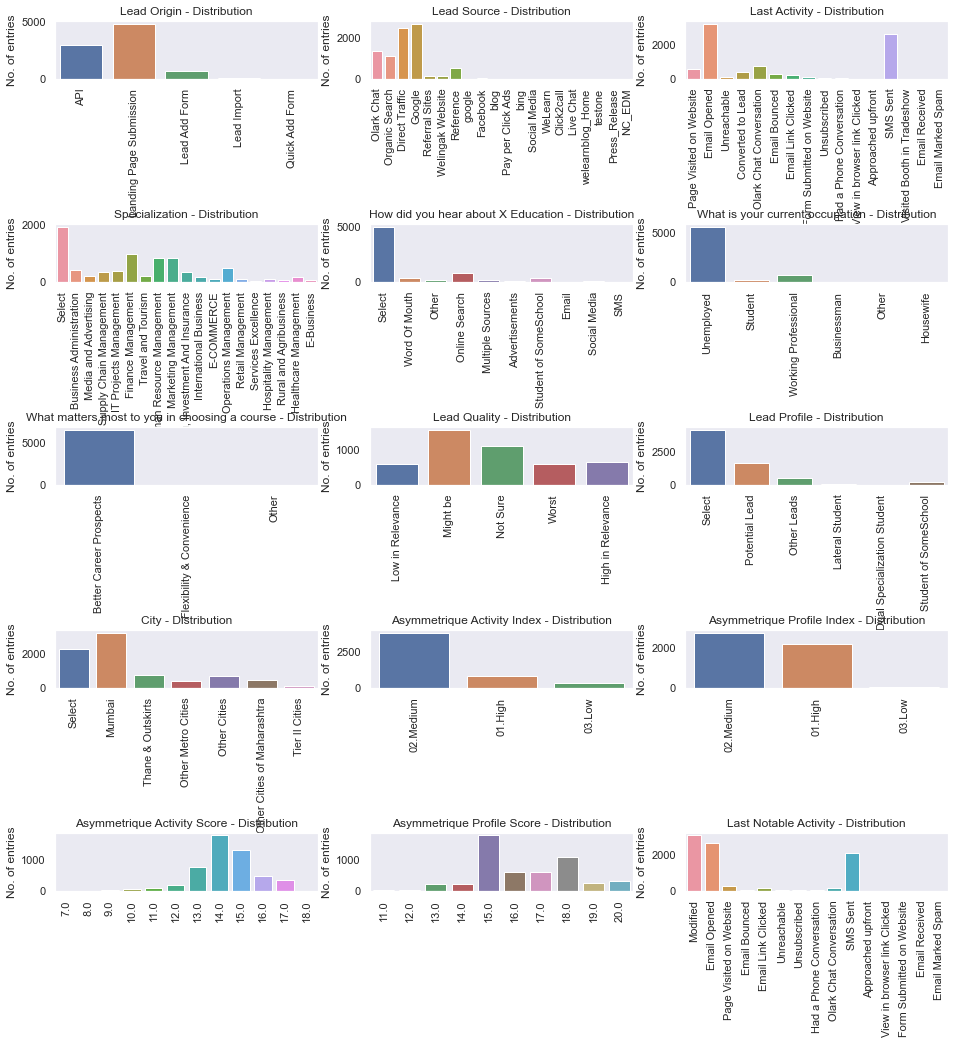

In [284]:
# Check the distribution of Categorical variables to get an idea of how the values are spread
col_list_for_count=['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity']
sns.set(style="dark")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count)):
    plt.subplot(5, 3, i+1)
    var=col_list_for_count[i]
    sns.countplot(x=var, data=df)
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 2.5)

From the above Univariate Analysis of Categorical variables, 
we can see that a value called "Select" is present in some of the fields.
This is mostly a drop-down value which was left as it is 
- as good as Data Not available. We can consider it as NaN for all Practical purposes

In [285]:
# Assign the np.NaN to the column values which are mentioned as Select
select_varlist = ['Specialization','How did you hear about X Education','Lead Profile','City']

##Check the Unique values with counts in all remaining fields after replacing with np.NaN
for x in select_varlist:
    df[x].replace('Select',np.NaN,inplace=True)

In [286]:
# Check the column wise null percentages. And start handling the NULL values

leads_null_fields=round((df.isna().sum())/len(df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.41
TotalVisits                                       1.57
Page Views Per Visit                              1.57
Last Activity                                     1.19
Country                                          23.85
Specialization                                   31.79
How did you hear about X Education               76.80
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     72.19
City                                             35.13
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
Asymmetrique Activity Score                      41.45
Asymmetrique Profile Score                       41.45
dtype: float64


- Bivariate Analysis of Categorical variables

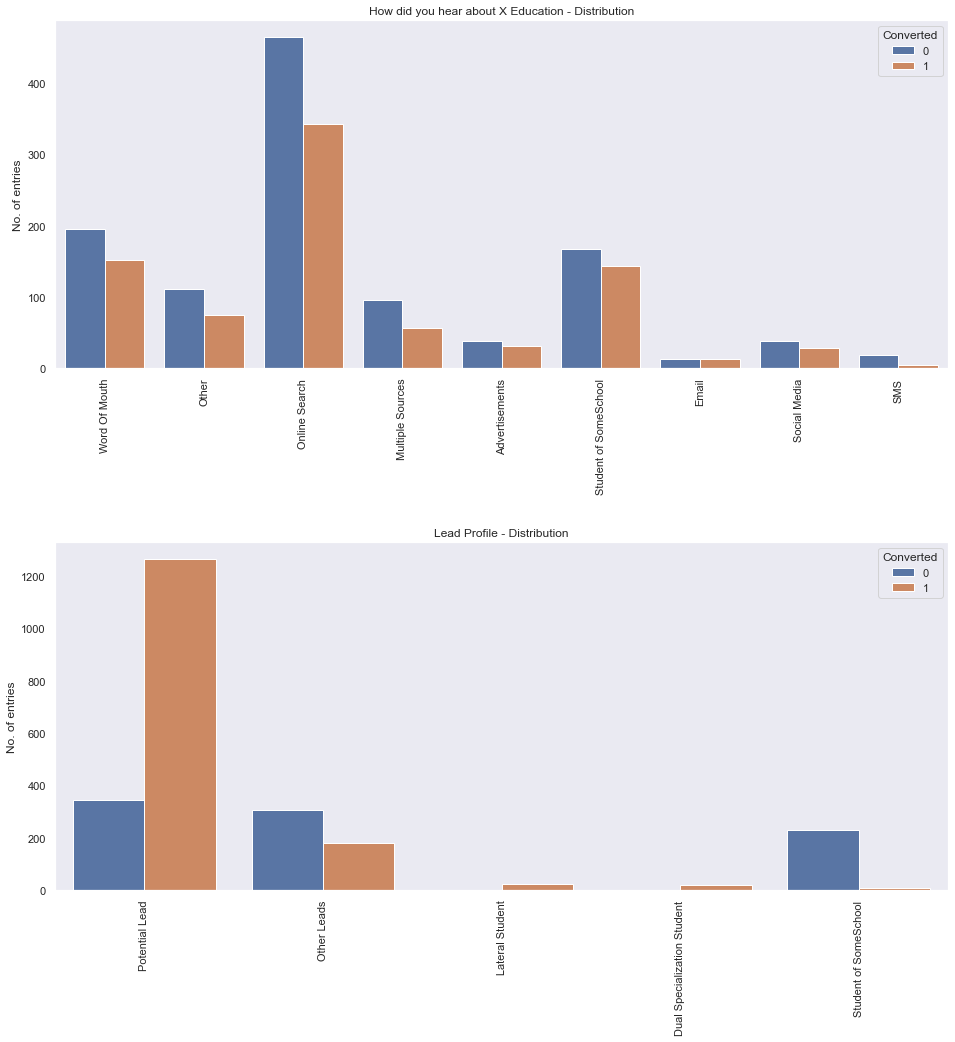

In [287]:
# Check the variables with very high NULL values
col_list_for_count3=['How did you hear about X Education','Lead Profile']
sns.set(style="dark")

# Visualising the histogram of the distribution of these two categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count3)):
    plt.subplot(2, 1, i+1)
    var=col_list_for_count3[i]
    #sns.countplot(leads_df[var])
    sns.countplot(x= var, hue = 'Converted', data = df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

In [288]:
# Drop the columns with more than 50% NULL values & adding no value to the Model

# Drop "How did you hear about X Education" column as it has very high NULL values & doesn't have much inference from it
df=df.drop('How did you hear about X Education',axis=1)

In [289]:
# Check the values of Asymmetric Index and Score
print(df['Asymmetrique Activity Index'].value_counts())
print(df['Asymmetrique Activity Score'].value_counts())
print(df['Asymmetrique Profile Index'].value_counts())
print(df['Asymmetrique Profile Score'].value_counts())

02.Medium    3839
01.High       820
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     348
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64
02.Medium    2787
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
15.0    1758
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64


- Clean the values in Assymetrique Columns

In [290]:
## Update the values in Assymmetrique columns
assymm_index_list = ['Asymmetrique Activity Index','Asymmetrique Profile Index']
df[assymm_index_list] = df[assymm_index_list].apply(lambda x: x.map({'01.High':'High','02.Medium':'Medium','03.Low':'Low'}))

print(df['Asymmetrique Activity Index'].value_counts())
print(df['Asymmetrique Profile Index'].value_counts())

Medium    3839
High       820
Low        362
Name: Asymmetrique Activity Index, dtype: int64
Medium    2787
High      2203
Low         31
Name: Asymmetrique Profile Index, dtype: int64


The Assymetrique Scores are already grouped by Asymmetrique Index columns. So, we can drop the Scores.

In [291]:
# Drop the Asymmetrique columns with score values - as they are already explained by Index columns

df=df.drop('Asymmetrique Activity Score',axis=1)
df=df.drop('Asymmetrique Profile Score',axis=1)

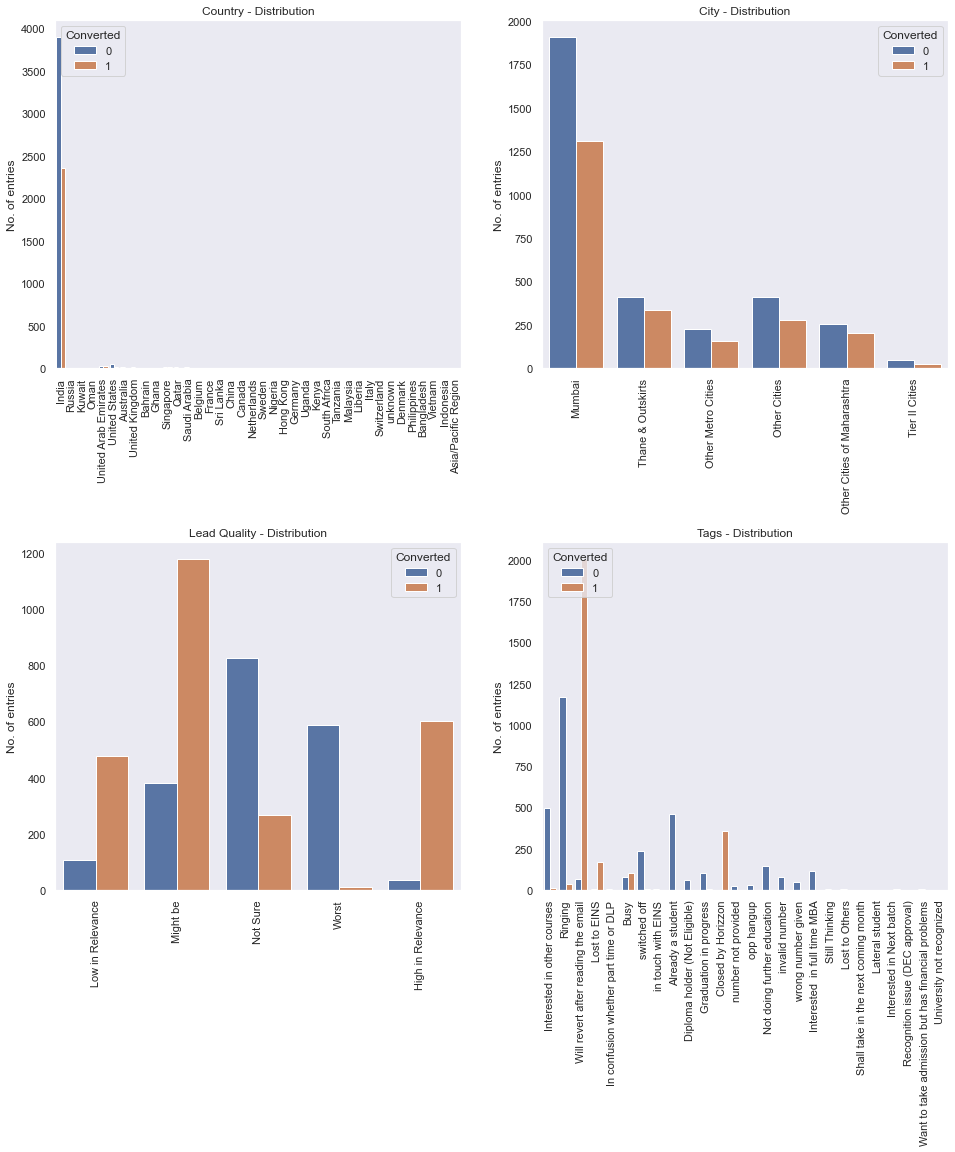

In [292]:
col_list_for_count2=['Country','City','Lead Quality','Tags']
sns.set(style="dark")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count2)):
    plt.subplot(2, 2, i+1)
    var=col_list_for_count2[i]
    sns.countplot(x= var, hue = 'Converted', data = df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

Country and City are locations
 - 39 different Country values with 23% being null
 - 8 different City values with 35% being null
 - From the count plots above it is clear that neither the Country nor City have a major influence on conversion rates
 - So dropping both the fields

In [293]:
# Dropping both the location fields

df=df.drop('Country',axis=1)
df=df.drop('City',axis=1)

In [294]:
# Check the column wise null percentages.

leads_null_fields=round((df.isna().sum())/len(df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.41
TotalVisits                                       1.57
Page Views Per Visit                              1.57
Last Activity                                     1.19
Specialization                                   31.79
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     72.19
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
dtype: float64


In [295]:
# Verify the description of numerical field that are NULL
df[['TotalVisits','Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,8441.000000,8441.000000
mean,3.603720,2.475223
std,4.954932,2.156764
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.500000
max,251.000000,55.000000


In [296]:
# Verify the description of numerical field which are having NULL
df.loc[df['TotalVisits'] == 3]['Page Views Per Visit'].describe()

count    1248.000000
mean        2.654247
std         0.648270
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Page Views Per Visit, dtype: float64

In [297]:
# Impute the NULLs in "TotalVisits" using median
df['TotalVisits'].fillna((df['TotalVisits'].median()), inplace=True)

# Impute the NULLs in "Page Views Per Visit" using mean calculated using the "median value of TotalVisits"
df['Page Views Per Visit'].replace(np.NaN,2.65,inplace=True)

# Check the remaining NULL fields
leads_null_fields=round((df.isna().sum())/len(df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Lead Source                                       0.41
Last Activity                                     1.19
Specialization                                   31.79
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     72.19
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
dtype: float64


In [298]:
# For the Categorical variables "Lead Scource" and "Last Activity" - as the NULL count is very less, impute with MODE

df['Lead Source'].fillna((df['Lead Source'].mode()[0]), inplace=True)
df['Last Activity'].fillna((df['Last Activity'].mode()[0]), inplace=True)

In [299]:
# Assign the np.NaN to the another 2 column values which are mentioned as Select
col_list_for_count3=['What is your current occupation','What matters most to you in choosing a course']

##Check the Unique values with counts in all remaining fields after replacing with np.NaN
for x in col_list_for_count3:
    df[x].replace('Select',np.NaN,inplace=True)

Visualise these two variables

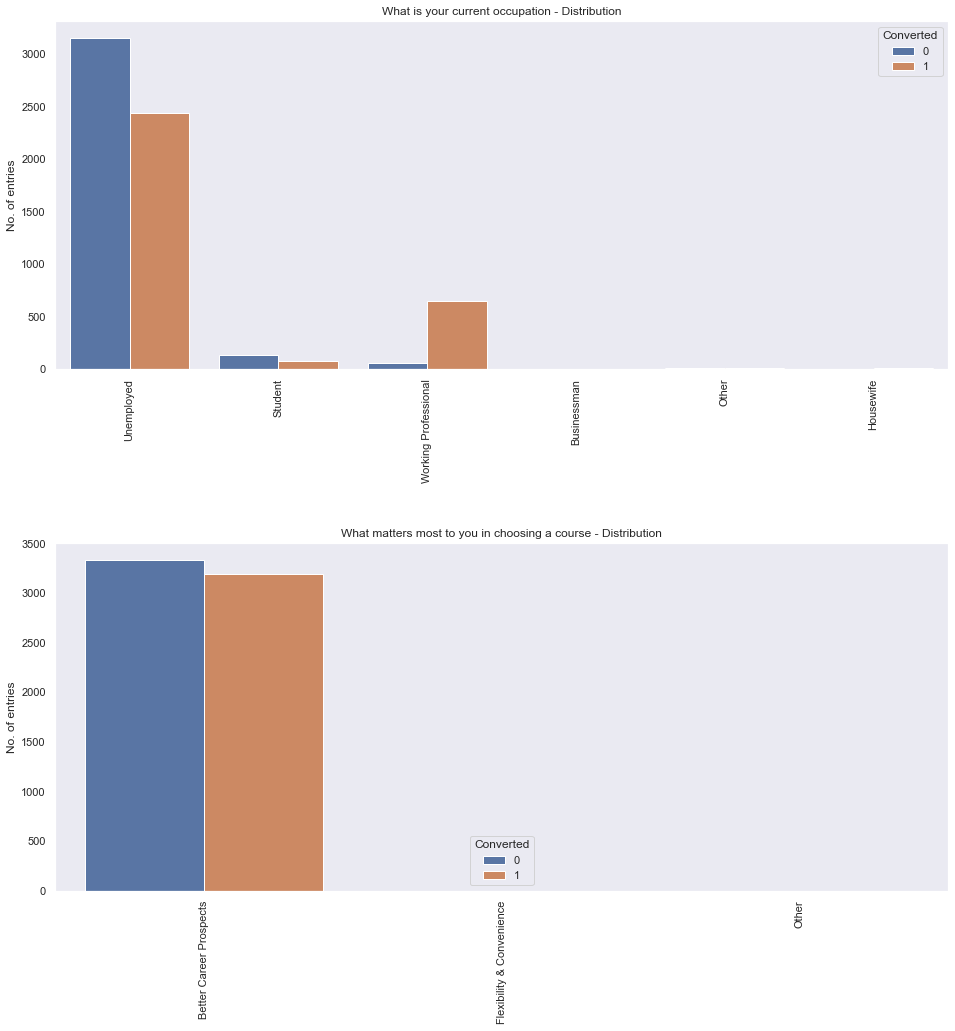

In [300]:
sns.set(style="dark")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count3)):
    plt.subplot(2, 1, i+1)
    var=col_list_for_count3[i]
    sns.countplot(x= var, hue = 'Converted', data = df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

What matters most to you in choosing a course: For this column, 
    majority of the values are "Better Career Prospects". 
    This column does not add much value as the out of available data non-null data 99.99% are 
    same value "Better Career Prospects".
    So dropping the column

In [301]:
# Drop the field
df=df.drop('What matters most to you in choosing a course',axis=1)

In [302]:
# For occupation, let's replace the NaN values with Unknown as value as imputing with any other will create bias

df['What is your current occupation'].fillna(('Unknown'), inplace=True)

Text(0.5, 0, '')

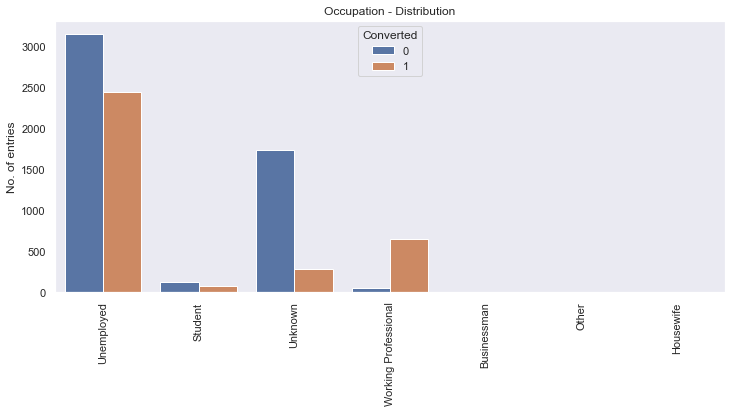

In [303]:
# Visualising the histogram of the distribution of occupation variables
plt.figure(figsize=(12,5))
sns.countplot(x= 'What is your current occupation', hue = 'Converted', data = df)
plt.xticks(rotation=90)
plt.title('Plotting data for target in terms of total count')
plt.title('Occupation - Distribution')
plt.ylabel('No. of entries')
plt.xticks(rotation=90)
plt.xlabel(None)

Check and start cleaning of remaining categorical variables

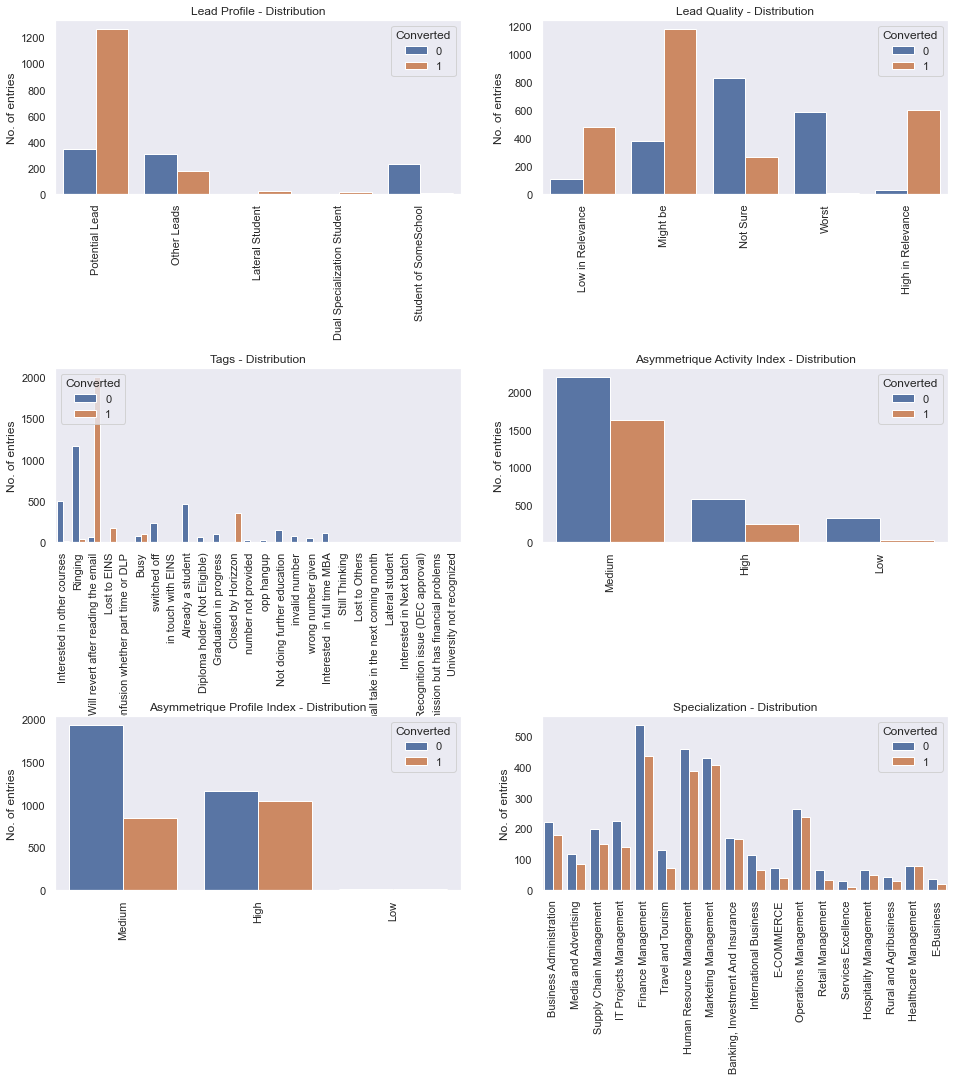

In [304]:
col_list_for_count4=['Lead Profile','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Specialization']

# Visualising the histogram of the distribution of these categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count4)):
    plt.subplot(3, 2, i+1)
    var=col_list_for_count4[i]
    sns.countplot(x= var, hue = 'Converted', data = df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)

From the above graph, it is clear that the "Converted" output is heavily dependent on few specific values of "Tags","Lead Profile" and "Lead Quality". So Imputing these fields will create Bias. Lets call them as "Unknown" for now. They can be handled at the Dummy varaiables phase.

In [305]:
# For Lead Profile, let's replace the NaN values with Unknown as value
df['Lead Profile'].fillna(('Unknown'), inplace=True)

# For Lead Quality, let's replace the NaN values with Unknown as value
df['Lead Quality'].fillna(('Unknown'), inplace=True) 

# For Tags, let's replace the NaN values with Unknown as value
df['Tags'].fillna(('Unknown'), inplace=True)

In [306]:
# For Specialization, let's replace the NaN values with Unknown as value
df['Specialization'].fillna(('Unknown'), inplace=True)

Impute the Asymmetrique Index fields without causing any bias. Imputing is done using the same percentage distribution of the values in the column i.e. if say 25% of valid data has value "High", 25% of NaN will be updated as High and so on.

In [307]:
x_df=pd.DataFrame(df['Asymmetrique Profile Index'].value_counts())
x_df.reset_index(inplace=True)
x_df.columns=['Asymmetrique Profile Index','count']
x_df
sums=x_df['count'].sum()
null_len=len(df.loc[df['Asymmetrique Profile Index'].isnull() == True])
i=0
j=0
for p,row in df.loc[df['Asymmetrique Profile Index'].isnull() == True].iterrows():
    df.at[p,'Asymmetrique Profile Index']=x_df['Asymmetrique Profile Index'][i]
    j=j+1
    if round(j/null_len*100,2) >= round(x_df['count'][i]/sums*100,2):
        j=0
    

In [308]:
x_df=pd.DataFrame(df['Asymmetrique Activity Index'].value_counts())
x_df.reset_index(inplace=True)
x_df.columns=['Asymmetrique Activity Index','count']
x_df
sums=x_df['count'].sum()
null_len=len(df.loc[df['Asymmetrique Activity Index'].isnull() == True])
i=0
j=0
for p,row in df.loc[df['Asymmetrique Activity Index'].isnull() == True].iterrows():
    df.at[p,'Asymmetrique Activity Index']=x_df['Asymmetrique Activity Index'][i]
    j=j+1
    if round(j/null_len*100,2) >= round(x_df['count'][i]/sums*100,2):
        j=0
        i=i+1

Checking the column distribution after changes

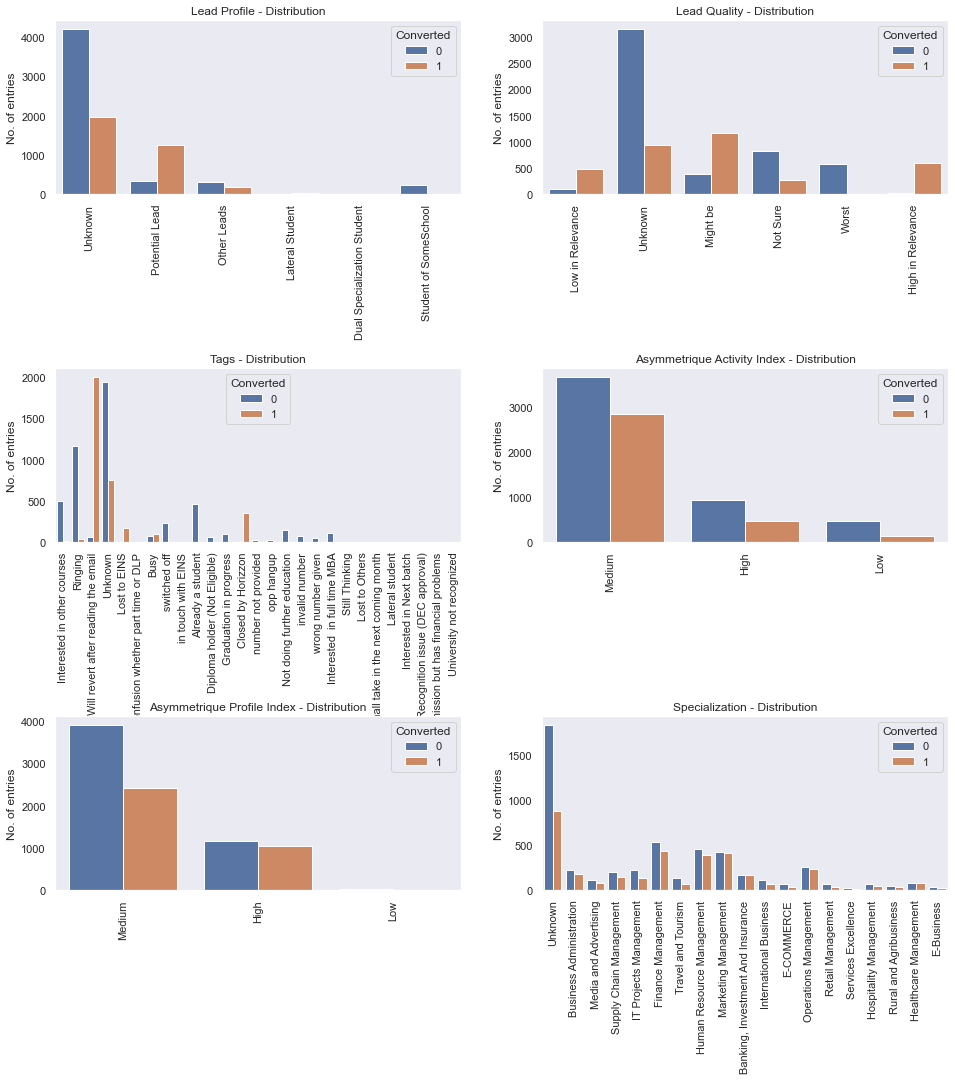

In [309]:
col_list_for_count4=['Lead Profile','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Specialization']

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count4)):
    plt.subplot(3, 2, i+1)
    var=col_list_for_count4[i]
    #sns.countplot(leads_df[var])
    sns.countplot(x= var, hue = 'Converted', data = df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)

Checking if any NULL fields are remaining

In [310]:
leads_null_fields=round((df.isna().sum())/len(df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])

Series([], dtype: float64)


In [311]:
df.shape

(8576, 25)

- Check how the values are distributed in the remaining Non-NULL Categorical variables

In [312]:
print(df['Do Not Email'].value_counts())
print(df['Do Not Call'].value_counts())
print(df['Search'].value_counts())
print(df['Newspaper Article'].value_counts())
print(df['X Education Forums'].value_counts())
print(df['Newspaper'].value_counts())
print(df['Digital Advertisement'].value_counts())
print(df['Through Recommendations'].value_counts())
print(df['A free copy of Mastering The Interview'].value_counts())

No     7896
Yes     680
Name: Do Not Email, dtype: int64
No     8574
Yes       2
Name: Do Not Call, dtype: int64
No     8562
Yes      14
Name: Search, dtype: int64
No     8574
Yes       2
Name: Newspaper Article, dtype: int64
No     8575
Yes       1
Name: X Education Forums, dtype: int64
No     8575
Yes       1
Name: Newspaper, dtype: int64
No     8572
Yes       4
Name: Digital Advertisement, dtype: int64
No     8569
Yes       7
Name: Through Recommendations, dtype: int64
No     5694
Yes    2882
Name: A free copy of Mastering The Interview, dtype: int64


Drop the columns that are heavily single-valued data. These data fields don't add much to the Model

In [313]:
# Drop the column with heavily single-valued data. These data fields don't add much to the Model
df=df.drop('Do Not Call',axis=1)
df=df.drop('Search',axis=1)
df=df.drop('Newspaper Article',axis=1)
df=df.drop('X Education Forums',axis=1)
df=df.drop('Newspaper',axis=1)
df=df.drop('Digital Advertisement',axis=1)
df=df.drop('Through Recommendations',axis=1)

Numerical Variable ananlysis

In [314]:
# List out the numerical variables that are part of the DataFrame
num_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
df[num_vars].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8576.000000,8576.000000,8576.000000
mean,3.594216,509.471199,2.477975
std,4.916348,552.873572,2.139830
min,0.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000
50%,3.000000,268.000000,2.000000
75%,5.000000,972.000000,3.500000
max,251.000000,2272.000000,55.000000


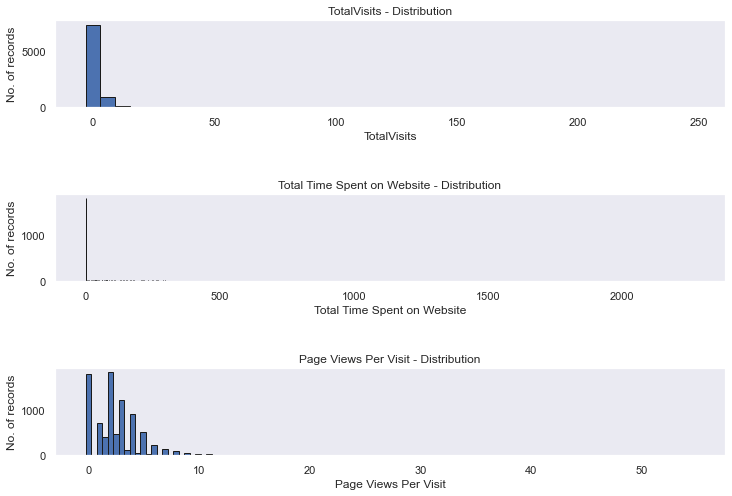

In [315]:
# Visualising the histogram of the distribution of all numeric variables
plt.figure(figsize=(12,8))
for i in range(len(num_vars)):
    plt.subplot(3,1, i+1)
    var=num_vars[i]
    df[var].plot.hist(edgecolor = 'k',bins=(len(df[var].unique())), align='left')
    plt.title(var+' - Distribution')
    plt.xlabel(var)
    plt.ylabel('No. of records')
    plt.subplots_adjust(hspace = 1) 

The above graph indiactes a possible outliers in the data. Lets remove outliers.

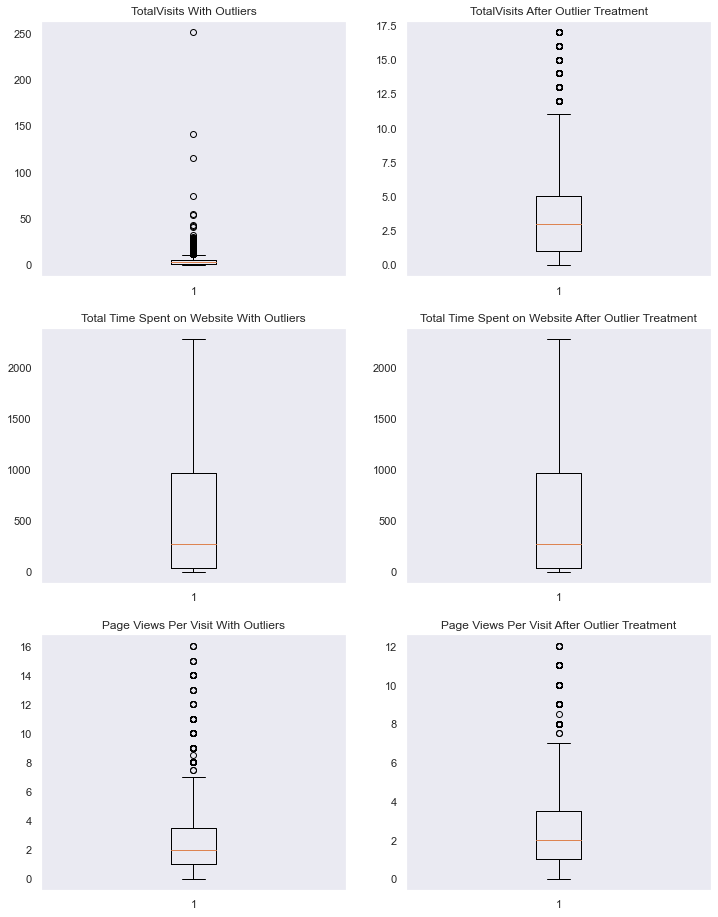

In [316]:
# Create a box plot of all the variables before and after Outlier treatment
plt.figure(figsize=(12,16))
pc_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
p=0
for j in range(len(pc_cols)):
    var=pc_cols[j]
    p=p+1
    plt.subplot(3, 2, p)
    plt.title(var+' With Outliers')
    plt.boxplot(df[var])
    Q1 = df[var].quantile(0.05)
    Q3 = df[var].quantile(0.90)
    IQR = Q3 - Q1
    df = df[(df[var] >= Q1 - 1.5*IQR) & (df[var] <= Q3 + 1.5*IQR)]
    p=p+1
    plt.subplot(3, 2, p)
    plt.title(var+' After Outlier Treatment')
    plt.boxplot(df[var])

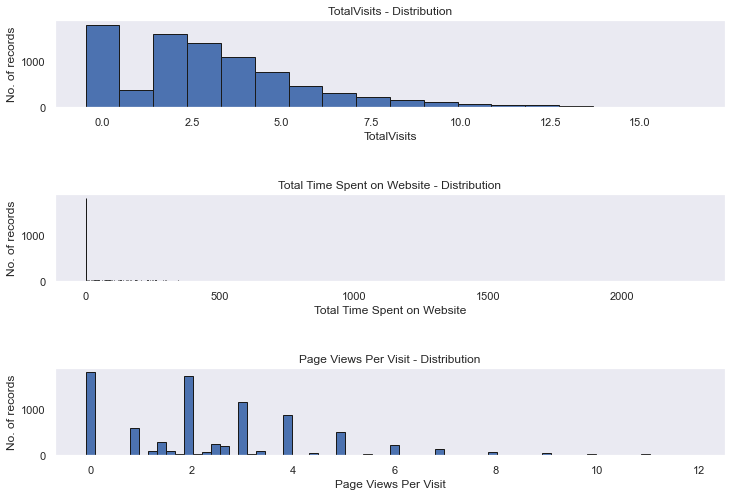

In [317]:
# Visualising the histogram of the distribution of all numeric variables after outlier treatment
plt.figure(figsize=(12,8))
for i in range(len(num_vars)):
    plt.subplot(3,1, i+1)
    var=num_vars[i]
    df[var].plot.hist(edgecolor = 'k',bins=(len(df[var].unique())), align='left')
    plt.title(var+' - Distribution')
    plt.xlabel(var)
    plt.ylabel('No. of records')
    plt.subplots_adjust(hspace = 1)  

Text(0, 0.5, 'No. of records')

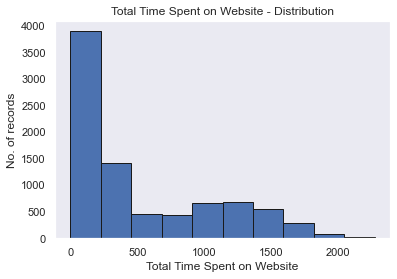

In [318]:
df['Total Time Spent on Website'].plot.hist(edgecolor = 'k')
plt.title('Total Time Spent on Website - Distribution')
plt.xlabel('Total Time Spent on Website')
plt.ylabel('No. of records')

Generate the Heat map of the numerical data

<AxesSubplot:>

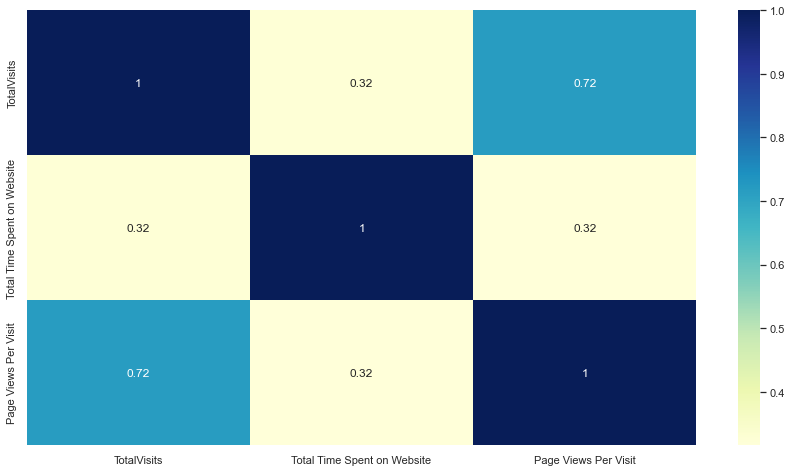

In [319]:
# Set the figure size
plt.figure(figsize=(15,8))

# Generate the heatmap
sns.heatmap(df[pc_cols].corr(),cmap='YlGnBu', annot=True)

- TotalVisits and Page Views Per Visit have high correlation of 0.72

Generate the Pie chart distribution of the Target Variable

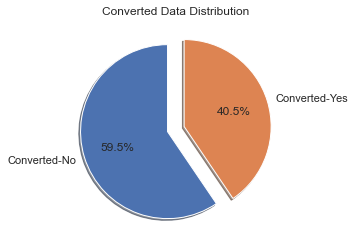

In [320]:
explode = (0.1, 0.1) 
pie_labels = ['Converted-No', 'Converted-Yes']
pie_sizes_m = df['Converted'].value_counts()/len(df.index) * 100
plt.pie(pie_sizes_m, labels=pie_labels, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Converted Data Distribution')

plt.show()

In [321]:
df['Converted'].value_counts()

0    5041
1    3433
Name: Converted, dtype: int64

In [322]:

df.shape

(8474, 18)

### END OF DATA ANALYSIS.

# Part 1.1 : Encoding of Categorical variables

Checking the values in the categorical variables and group the minor values into one single dummy value.


In [323]:
print(df['Do Not Email'].value_counts())
print(df['A free copy of Mastering The Interview'].value_counts())

No     7813
Yes     661
Name: Do Not Email, dtype: int64
No     5656
Yes    2818
Name: A free copy of Mastering The Interview, dtype: int64


In [324]:
yes_no_list=['Do Not Email','A free copy of Mastering The Interview']

for var in yes_no_list:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(df[var],prefix=var)
    df = pd.concat([df,dummy_df], axis=1)
    # Dropping the "Yes" entries as they are less in number
    df.drop([var,var+'_Yes'], axis =1 , inplace=True)

df.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity,Do Not Email_No,A free copy of Mastering The Interview_No
0,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Interested in other courses,Low in Relevance,Unknown,Medium,Medium,Modified,1,1
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Ringing,Unknown,Unknown,Medium,Medium,Email Opened,1,1
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,Medium,High,Email Opened,1,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Unknown,Medium,High,Modified,1,1
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Will revert after reading the email,Might be,Unknown,Medium,High,Modified,1,1


Checking the values in the categorical variables and group the minor values into one single dummy value.

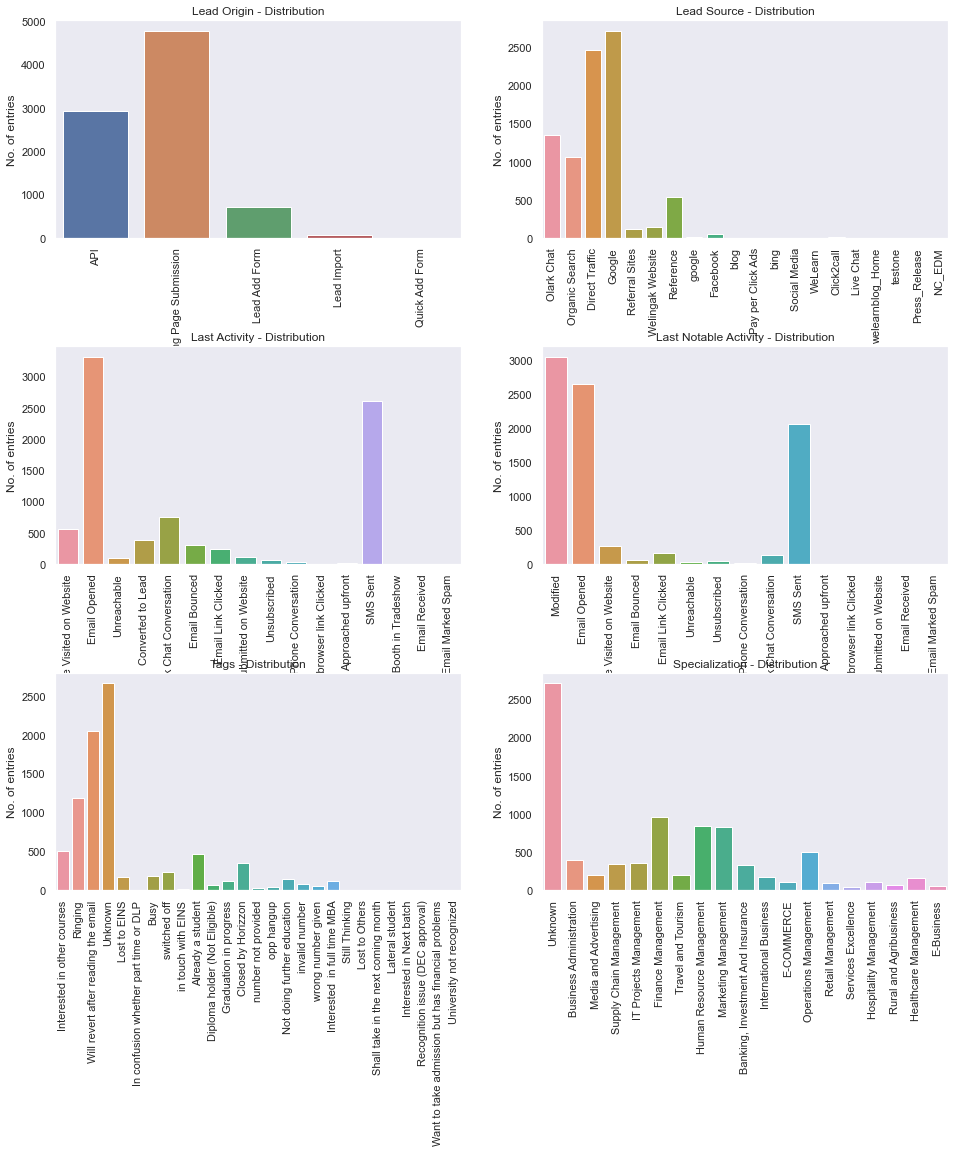

In [325]:
col_list_categ=['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Tags','Specialization']

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_categ)):
    plt.subplot(3, 2, i+1)
    var=col_list_categ[i]
    sns.countplot(x=var, data=df)
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)

In [326]:
print(df['Tags'].value_counts())
print(df['Specialization'].value_counts())

Unknown                                              2666
Will revert after reading the email                  2053
Ringing                                              1182
Interested in other courses                           506
Already a student                                     462
Closed by Horizzon                                    348
switched off                                          237
Busy                                                  185
Lost to EINS                                          169
Not doing further education                           138
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    27
in touch with 

In [327]:
##Group the minor values of these column into one single viz. Others
for p,row in df.iterrows():
    if df.at[p,'Lead Origin']== 'Quick Add Form':
        df.at[p,'Lead Origin'] = 'Others'
    
    if df.at[p,'Lead Source']== 'google':
        df.at[p,'Lead Source'] = 'Google'
    elif df.at[p,'Lead Source'] in (['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home','testone','Press_Release','NC_EDM']):
        df.at[p,'Lead Source'] = 'Others'
    
    if df.at[p,'Last Activity'] in (['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Visited Booth in Tradeshow']):
        df.at[p,'Last Activity'] = 'Others'
    
    if df.at[p,'Last Notable Activity'] in (['Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','View in browser link Clicked','Email Received','Form Submitted on Website']):
        df.at[p,'Last Notable Activity'] = 'Others'
    
    if df.at[p,'Tags'] in (['wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems','Still Thinking','Interested in Next batch','In confusion whether part time or DLP','Lateral student','University not recognized','Shall take in the next coming month','Recognition issue (DEC approval)']):
        df.at[p,'Tags'] = 'Others'
        
print(df['Lead Origin'].value_counts())
print(df['Lead Source'].value_counts())
print(df['Last Activity'].value_counts())
print(df['Last Notable Activity'].value_counts())
print(df['Tags'].value_counts())

Landing Page Submission    4775
API                        2927
Lead Add Form               716
Lead Import                  55
Others                        1
Name: Lead Origin, dtype: int64
Google              2724
Direct Traffic      2471
Olark Chat          1345
Organic Search      1066
Reference            533
Welingak Website     142
Referral Sites       119
Facebook              55
Others                19
Name: Lead Source, dtype: int64
Email Opened                 3315
SMS Sent                     2610
Olark Chat Conversation       750
Page Visited on Website       557
Converted to Lead             389
Email Bounced                 301
Email Link Clicked            246
Form Submitted on Website     113
Unreachable                    89
Unsubscribed                   56
Others                         48
Name: Last Activity, dtype: int64
Modified                   3055
Email Opened               2651
SMS Sent                   2063
Page Visited on Website     259
Email Link Clic

In [328]:
#Create the dummy variables and drop the "Others" values
col_list_categ=['Lead Origin','Lead Source','Last Activity','Last Notable Activity']

for var in col_list_categ:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(df[var],prefix=var)
    df = pd.concat([df,dummy_df], axis=1)
    # Dropping the Others entries as they are less in number
    df.drop([var,var+'_Others'], axis =1 , inplace=True)

df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Tags,Lead Quality,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,660737,0,0.0,0,0.0,Unknown,Unemployed,Interested in other courses,Low in Relevance,Unknown,Medium,Medium,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,Unknown,Unemployed,Ringing,Unknown,Unknown,Medium,Medium,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,660727,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,Medium,High,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Not Sure,Unknown,Medium,High,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,660681,1,2.0,1428,1.0,Unknown,Unemployed,Will revert after reading the email,Might be,Unknown,Medium,High,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [329]:
#Create the dummy variables and drop the "Unknown" and "Others" values
col_list_categ_2=['Specialization','What is your current occupation','Tags','Lead Quality','Lead Profile']

for var in col_list_categ_2:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(df[var],prefix=var)
    df = pd.concat([df,dummy_df], axis=1)
    # Dropping the Others entries as they are less in number
    df.drop([var,var+'_Unknown'], axis =1 , inplace=True)
    if var == 'Tags':
        df.drop([var+'_Others'], axis =1 , inplace=True)
        

df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Index,Asymmetrique Profile Index,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool
0,660737,0,0.0,0,0.0,Medium,Medium,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,660728,0,5.0,674,2.5,Medium,Medium,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,Medium,High,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
3,660719,0,1.0,305,1.0,Medium,High,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,660681,1,2.0,1428,1.0,Medium,High,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0


In [330]:
# Dummy Variables for Index columns
col_list_categ_3=['Asymmetrique Activity Index','Asymmetrique Profile Index']

for var in col_list_categ_3:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(df[var],prefix=var)
    df = pd.concat([df,dummy_df], axis=1)
    # Dropping the Others entries as they are less in number
    df.drop([var,var+'_Low'], axis =1 , inplace=True)

df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
0,660737,0,0.0,0,0.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,660728,0,5.0,674,2.5,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,660727,1,2.0,1532,2.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
3,660719,0,1.0,305,1.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,660681,1,2.0,1428,1.0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [331]:
df.shape

(8474, 88)

# Part 1.3. Test-Train Split

In [332]:
# Drop the Lead Number, Converted fields to form the X features
X=df.drop(['Lead Number','Converted'], axis =1)
X.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
0,0.0,0,0.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,5.0,674,2.5,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,2.0,1532,2.0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
3,1.0,305,1.0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0
4,2.0,1428,1.0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0


In [333]:
# Create the Y variable
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

### Splitting the data into train and test

In [334]:
# Split 70:30 into Training and Test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=855)

In [335]:
# Scale the numerical data to remove disparities in magnitude and scales of numerical variables
num_vars= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

scaler = StandardScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Do Not Email_No,A free copy of Mastering The Interview_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Lead Quality_High in Relevance,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Profile_Dual Specialization Student,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
4947,0.237087,0.532823,-0.557070,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1
1487,-0.106634,-0.886586,-0.470182,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6604,-0.450356,-0.503400,-0.214627,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1
9140,-0.450356,-0.708485,-0.214627,1,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
8038,0.924531,0.383506,-0.470182,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0


## End of Test-Train Splitting & Scaling

# Part 1.4: Model Building

In [336]:
# Logistic Regression Model
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5844
Model Family:                Binomial   Df Model:                           86
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1012.7
Date:                Sun, 12 Mar 2023   Deviance:                       2025.3
Time:                        14:51:26   Pearson chi2:                 8.37e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6342
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   19.0068   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
TotalVisits                                              0.3189      0.089      3.568      0.000       0.144       0.494
Total Time Spent on Website                              1.0540      0.068     15.490      0.000       0.921       1.187
Page Views Per Visit                                    -0.2756      0.098     -2.824      0.005      -0.467      -0.084
Do Not Email_No                                          0.7677      0.336      2.282      0.022       0.108       1.427
A free copy of Mastering The Interview_No                0.1040      0.193      0.538      0.591      -0.275       0.483
Lead Origin_API                                        -24.0352   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Origin_Landing Page Submission                    -24.1861   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Origin_Lead Add Form                              -22.9047   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
Lead Origin_Lead Import                                -47.4008   1.85e+05     -0.000      1.000   -3.63e+05    3.63e+05
Lead Source_Direct Traffic                               0.8532      1.415      0.603      0.546      -1.920       3.626
Lead Source_Facebook                                    23.0167   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                       0.9802      1.401      0.700      0.484      -1.766       3.726
Lead Source_Olark Chat                                   1.8704      1.412      1.324      0.185      -0.898       4.639
Lead Source_Organic Search                               0.7004      1.416      0.495      0.621      -2.075       3.476
Lead Source_Reference                                    0.5963      1.474      0.405      0.686      -2.293       3.485
Lead Source_Referral Sites                               0.2686      1.497      0.179      0.858      -2.666       3.203
Lead Source_Welingak Website                             4.4229      1.758      2.516      0.012       0.978       7.868
Last Activity_Converted to Lead                          0.3278      1.155      0.284      0.777      -1.937       2.593
Last Activity_Email Bounced                              0.0468      1.267      0.037      0.971      -2.437       2.530
Last Activity_Email Link Clicked                         1.4861      1.296      1.146      0.252      -1.055       4.027
Last Activity_Email Opened                               1.2346      1.129      1.093      0.274      -0.979       3.448
Last Activity_Form Submitted on Website                  0

Implement RFE for Feature Elimination

In [337]:
logreg=LogisticRegression()
rfe=RFE(logreg,step=20)
rfe=rfe.fit(X_train,y_train)

In [338]:
rfe.support_

array([False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False,  True, False, False,  True,  True,  True,
        True, False, False, False,  True, False,  True, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False, False,  True,  True,
       False,  True,  True, False, False])

In [339]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Do Not Email_No', True, 1),
 ('A free copy of Mastering The Interview_No', False, 4),
 ('Lead Origin_API', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 4),
 ('Last Activity_Email Opened', False, 3),
 ('Last Activity_Form Submitted on Website', False, 4),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited

Get the list of RFE selected columns

In [340]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Do Not Email_No',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Profe

In [341]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview_No', 'Lead Origin_API',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unsubscribed',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Spe

Build the model from RFE selected columns

In [342]:
# Model 1
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5887
Model Family:                Binomial   Df Model:                           43
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1032.3
Date:                Sun, 12 Mar 2023   Deviance:                       2064.6
Time:                        14:51:28   Pearson chi2:                 7.86e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6318
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.7415      0.432     -8.670      0.000      -4.587      -2.896
Total Time Spent on Website                              1.0428      0.066     15.853      0.000       0.914       1.172
Do Not Email_No                                          0.8553      0.303      2.820      0.005       0.261       1.450
Lead Origin_Landing Page Submission                     -0.5307      0.161     -3.288      0.001      -0.847      -0.214
Lead Origin_Lead Add Form                                0.8255      0.403      2.048      0.041       0.035       1.616
Lead Origin_Lead Import                                 -1.4052      0.851     -1.651      0.099      -3.074       0.263
Lead Source_Olark Chat                                   1.0004      0.205      4.887      0.000       0.599       1.402
Lead Source_Referral Sites                              -0.5389      0.539     -0.999      0.318      -1.596       0.518
Lead Source_Welingak Website                             3.9600      1.086      3.647      0.000       1.832       6.088
Last Activity_Converted to Lead                         -0.6025      0.392     -1.536      0.125      -1.371       0.166
Last Activity_Email Bounced                             -0.4872      0.505     -0.964      0.335      -1.477       0.503
Last Activity_Olark Chat Conversation                   -0.4239      0.321     -1.321      0.186      -1.053       0.205
Last Activity_SMS Sent                                   1.1502      0.277      4.159      0.000       0.608       1.692
Last Notable Activity_Email Link Clicked                -1.0551      0.423     -2.495      0.013      -1.884      -0.226
Last Notable Activity_Modified                          -0.9193      0.206     -4.471      0.000      -1.322      -0.516
Last Notable Activity_Olark Chat Conversation           -1.4260      0.578     -2.467      0.014      -2.559      -0.293
Last Notable Activity_SMS Sent                           0.6376      0.311      2.051      0.040       0.028       1.247
Specialization_Supply Chain Management                  -0.8103      0.342     -2.372      0.018      -1.480      -0.141
Specialization_Travel and Tourism                       -0.7536      0.452     -1.668      0.095      -1.639       0.132
What is your current occupation_Businessman              3.7106      1.997      1.858      0.063      -0.204       7.625
What is your current occupation_Housewife               22.8585   4.29e+04      0.001      1.000   -8.41e+04    8.42e+04
What is your current occupation_Other                    3.6601      2.979      1.229      0.219      -2.178       9.498
What is your current occupation_Student                  2

Check Multicollinearity using Variance Inflation Factor

In [343]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,Do Not Email_No,12.06
42,Asymmetrique Activity Index_Medium,9.36
22,What is your current occupation_Unemployed,8.02
15,Last Notable Activity_SMS Sent,7.39
11,Last Activity_SMS Sent,7.19
33,Tags_Will revert after reading the email,4.61
2,Lead Origin_Landing Page Submission,3.98
13,Last Notable Activity_Modified,3.53
41,Asymmetrique Activity Index_High,2.91
23,What is your current occupation_Working Profes...,2.44


In [344]:
# Drop the column with high p-value as this is insignificant
col=col.drop('What is your current occupation_Housewife',1)

col

Index(['Total Time Spent on Website', 'Do Not Email_No',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism',
       'What is your current occupation_Businessman',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Clo

In [345]:
#  Model 2
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5888
Model Family:                Binomial   Df Model:                           42
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1033.6
Date:                Sun, 12 Mar 2023   Deviance:                       2067.2
Time:                        14:51:32   Pearson chi2:                 7.93e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6316
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.7351      0.432     -8.645      0.000      -4.582      -2.888
Total Time Spent on Website                              1.0427      0.066     15.858      0.000       0.914       1.172
Do Not Email_No                                          0.8543      0.304      2.813      0.005       0.259       1.450
Lead Origin_Landing Page Submission                     -0.5334      0.161     -3.305      0.001      -0.850      -0.217
Lead Origin_Lead Add Form                                0.8899      0.400      2.226      0.026       0.106       1.673
Lead Origin_Lead Import                                 -1.4066      0.854     -1.647      0.100      -3.080       0.267
Lead Source_Olark Chat                                   1.0011      0.205      4.892      0.000       0.600       1.402
Lead Source_Referral Sites                              -0.5416      0.540     -1.002      0.316      -1.601       0.518
Lead Source_Welingak Website                             3.9087      1.085      3.603      0.000       1.782       6.035
Last Activity_Converted to Lead                         -0.6110      0.393     -1.557      0.120      -1.380       0.158
Last Activity_Email Bounced                             -0.4946      0.507     -0.976      0.329      -1.488       0.498
Last Activity_Olark Chat Conversation                   -0.4327      0.321     -1.348      0.178      -1.062       0.196
Last Activity_SMS Sent                                   1.1389      0.276      4.123      0.000       0.598       1.680
Last Notable Activity_Email Link Clicked                -1.0048      0.414     -2.428      0.015      -1.816      -0.194
Last Notable Activity_Modified                          -0.9146      0.205     -4.457      0.000      -1.317      -0.512
Last Notable Activity_Olark Chat Conversation           -1.4163      0.578     -2.450      0.014      -2.550      -0.283
Last Notable Activity_SMS Sent                           0.6496      0.311      2.091      0.037       0.041       1.259
Specialization_Supply Chain Management                  -0.8234      0.342     -2.405      0.016      -1.494      -0.152
Specialization_Travel and Tourism                       -0.7609      0.453     -1.681      0.093      -1.648       0.126
What is your current occupation_Businessman              3.6650      1.970      1.861      0.063      -0.196       7.526
What is your current occupation_Other                    3.5725      2.994      1.193      0.233      -2.295       9.440
What is your current occupation_Student                  2.0037      0.598      3.353      0.001       0.832       3.175
What is your current occupation_Unemployed               1

In [346]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,Do Not Email_No,12.05
41,Asymmetrique Activity Index_Medium,9.36
21,What is your current occupation_Unemployed,7.88
15,Last Notable Activity_SMS Sent,7.39
11,Last Activity_SMS Sent,7.19
32,Tags_Will revert after reading the email,4.59
2,Lead Origin_Landing Page Submission,3.98
13,Last Notable Activity_Modified,3.53
40,Asymmetrique Activity Index_High,2.91
22,What is your current occupation_Working Profes...,2.41


In [347]:
# Drop the column with high p-value as this is insignificant
col=col.drop('Tags_invalid number',1)

In [348]:
#  Model 3
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5889
Model Family:                Binomial   Df Model:                           41
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1059.2
Date:                Sun, 12 Mar 2023   Deviance:                       2118.3
Time:                        14:51:35   Pearson chi2:                 8.07e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6284
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.7417      0.427     -8.767      0.000      -4.578      -2.905
Total Time Spent on Website                              1.0519      0.065     16.229      0.000       0.925       1.179
Do Not Email_No                                          0.8772      0.297      2.950      0.003       0.294       1.460
Lead Origin_Landing Page Submission                     -0.5730      0.159     -3.611      0.000      -0.884      -0.262
Lead Origin_Lead Add Form                                0.9434      0.401      2.353      0.019       0.158       1.729
Lead Origin_Lead Import                                 -1.3780      0.865     -1.594      0.111      -3.073       0.317
Lead Source_Olark Chat                                   1.0340      0.201      5.136      0.000       0.639       1.429
Lead Source_Referral Sites                              -0.5105      0.541     -0.943      0.346      -1.572       0.550
Lead Source_Welingak Website                             4.0007      1.085      3.686      0.000       1.873       6.128
Last Activity_Converted to Lead                         -0.6381      0.391     -1.633      0.102      -1.404       0.128
Last Activity_Email Bounced                             -0.4802      0.504     -0.952      0.341      -1.468       0.508
Last Activity_Olark Chat Conversation                   -0.4633      0.319     -1.451      0.147      -1.089       0.162
Last Activity_SMS Sent                                   1.1195      0.274      4.079      0.000       0.582       1.657
Last Notable Activity_Email Link Clicked                -0.9719      0.417     -2.333      0.020      -1.788      -0.155
Last Notable Activity_Modified                          -0.8874      0.204     -4.349      0.000      -1.287      -0.488
Last Notable Activity_Olark Chat Conversation           -1.3859      0.575     -2.411      0.016      -2.513      -0.259
Last Notable Activity_SMS Sent                           0.6375      0.308      2.073      0.038       0.035       1.240
Specialization_Supply Chain Management                  -0.8455      0.335     -2.527      0.012      -1.501      -0.190
Specialization_Travel and Tourism                       -0.8221      0.435     -1.888      0.059      -1.675       0.031
What is your current occupation_Businessman              3.6179      1.912      1.892      0.058      -0.130       7.365
What is your current occupation_Other                    3.7159      3.440      1.080      0.280      -3.026      10.458
What is your current occupation_Student                  1.9730      0.603      3.272      0.001       0.791       3.155
What is your current occupation_Unemployed               1

In [349]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,Do Not Email_No,12.05
40,Asymmetrique Activity Index_Medium,9.36
21,What is your current occupation_Unemployed,7.47
15,Last Notable Activity_SMS Sent,7.39
11,Last Activity_SMS Sent,7.19
32,Tags_Will revert after reading the email,4.44
2,Lead Origin_Landing Page Submission,3.97
13,Last Notable Activity_Modified,3.53
39,Asymmetrique Activity Index_High,2.91
22,What is your current occupation_Working Profes...,2.37


In [350]:
# Drop the column with high p-value as this is insignificant
col=col.drop('Last Activity_Email Bounced',1)

In [351]:
#  Model 4
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5890
Model Family:                Binomial   Df Model:                           40
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1059.6
Date:                Sun, 12 Mar 2023   Deviance:                       2119.2
Time:                        14:51:37   Pearson chi2:                 7.99e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6284
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8980      0.397     -9.820      0.000      -4.676      -3.120
Total Time Spent on Website                              1.0502      0.065     16.207      0.000       0.923       1.177
Do Not Email_No                                          1.0359      0.250      4.138      0.000       0.545       1.527
Lead Origin_Landing Page Submission                     -0.5699      0.159     -3.592      0.000      -0.881      -0.259
Lead Origin_Lead Add Form                                0.9426      0.401      2.349      0.019       0.156       1.729
Lead Origin_Lead Import                                 -1.3904      0.869     -1.600      0.110      -3.094       0.313
Lead Source_Olark Chat                                   1.0289      0.201      5.113      0.000       0.634       1.423
Lead Source_Referral Sites                              -0.4989      0.542     -0.920      0.357      -1.561       0.563
Lead Source_Welingak Website                             4.0005      1.085      3.689      0.000       1.875       6.126
Last Activity_Converted to Lead                         -0.5967      0.388     -1.537      0.124      -1.358       0.164
Last Activity_Olark Chat Conversation                   -0.4215      0.317     -1.331      0.183      -1.042       0.199
Last Activity_SMS Sent                                   1.1674      0.270      4.321      0.000       0.638       1.697
Last Notable Activity_Email Link Clicked                -0.9659      0.417     -2.318      0.020      -1.783      -0.149
Last Notable Activity_Modified                          -0.9247      0.200     -4.614      0.000      -1.318      -0.532
Last Notable Activity_Olark Chat Conversation           -1.4130      0.574     -2.460      0.014      -2.539      -0.287
Last Notable Activity_SMS Sent                           0.6044      0.306      1.976      0.048       0.005       1.204
Specialization_Supply Chain Management                  -0.8478      0.334     -2.537      0.011      -1.503      -0.193
Specialization_Travel and Tourism                       -0.8377      0.436     -1.921      0.055      -1.692       0.017
What is your current occupation_Businessman              3.6129      1.912      1.889      0.059      -0.135       7.361
What is your current occupation_Other                    3.7747      3.499      1.079      0.281      -3.083      10.633
What is your current occupation_Student                  1.9371      0.594      3.261      0.001       0.773       3.101
What is your current occupation_Unemployed               1.5824      0.142     11.162      0.000       1.305       1.860
What is your current occupation_Working Professional     2

In [352]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,Do Not Email_No,9.31
39,Asymmetrique Activity Index_Medium,8.43
20,What is your current occupation_Unemployed,7.37
14,Last Notable Activity_SMS Sent,7.20
10,Last Activity_SMS Sent,6.93
31,Tags_Will revert after reading the email,4.44
2,Lead Origin_Landing Page Submission,3.85
12,Last Notable Activity_Modified,3.16
38,Asymmetrique Activity Index_High,2.74
21,What is your current occupation_Working Profes...,2.35


In [353]:
# Drop the column with high p-value as this is insignificant
col=col.drop('Lead Source_Referral Sites',1)

In [354]:
#  Model 5
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5891
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1060.1
Date:                Sun, 12 Mar 2023   Deviance:                       2120.1
Time:                        14:51:40   Pearson chi2:                 7.99e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6283
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9391      0.394     -9.996      0.000      -4.711      -3.167
Total Time Spent on Website                              1.0518      0.065     16.234      0.000       0.925       1.179
Do Not Email_No                                          1.0387      0.250      4.155      0.000       0.549       1.529
Lead Origin_Landing Page Submission                     -0.5425      0.156     -3.478      0.001      -0.848      -0.237
Lead Origin_Lead Add Form                                0.9717      0.400      2.429      0.015       0.188       1.756
Lead Origin_Lead Import                                 -1.3603      0.869     -1.566      0.117      -3.063       0.342
Lead Source_Olark Chat                                   1.0596      0.199      5.329      0.000       0.670       1.449
Lead Source_Welingak Website                             4.0015      1.085      3.690      0.000       1.876       6.127
Last Activity_Converted to Lead                         -0.5946      0.389     -1.529      0.126      -1.357       0.168
Last Activity_Olark Chat Conversation                   -0.4275      0.317     -1.348      0.178      -1.049       0.194
Last Activity_SMS Sent                                   1.1703      0.270      4.334      0.000       0.641       1.700
Last Notable Activity_Email Link Clicked                -0.9594      0.416     -2.305      0.021      -1.775      -0.144
Last Notable Activity_Modified                          -0.9206      0.200     -4.596      0.000      -1.313      -0.528
Last Notable Activity_Olark Chat Conversation           -1.3971      0.574     -2.434      0.015      -2.522      -0.272
Last Notable Activity_SMS Sent                           0.6092      0.306      1.993      0.046       0.010       1.208
Specialization_Supply Chain Management                  -0.8510      0.335     -2.542      0.011      -1.507      -0.195
Specialization_Travel and Tourism                       -0.8361      0.436     -1.919      0.055      -1.690       0.018
What is your current occupation_Businessman              3.6595      1.920      1.906      0.057      -0.103       7.422
What is your current occupation_Other                    3.7813      3.509      1.078      0.281      -3.096      10.658
What is your current occupation_Student                  1.9409      0.594      3.269      0.001       0.777       3.105
What is your current occupation_Unemployed               1.5860      0.142     11.201      0.000       1.309       1.864
What is your current occupation_Working Professional     2.7191      0.414      6.575      0.000       1.909       3.530
Tags_Already a student                                  -3

In [355]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,Do Not Email_No,9.26
38,Asymmetrique Activity Index_Medium,8.39
19,What is your current occupation_Unemployed,7.37
13,Last Notable Activity_SMS Sent,7.20
9,Last Activity_SMS Sent,6.92
30,Tags_Will revert after reading the email,4.44
2,Lead Origin_Landing Page Submission,3.76
11,Last Notable Activity_Modified,3.15
37,Asymmetrique Activity Index_High,2.73
20,What is your current occupation_Working Profes...,2.35


In [356]:
# Drop the column with high p-value as this is insignificant
col=col.drop('What is your current occupation_Other',1)

In [357]:
#  Model 6
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5892
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1061.4
Date:                Sun, 12 Mar 2023   Deviance:                       2122.8
Time:                        14:51:43   Pearson chi2:                 8.07e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6282
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9392      0.395     -9.980      0.000      -4.713      -3.166
Total Time Spent on Website                              1.0513      0.065     16.233      0.000       0.924       1.178
Do Not Email_No                                          1.0395      0.250      4.153      0.000       0.549       1.530
Lead Origin_Landing Page Submission                     -0.5409      0.156     -3.469      0.001      -0.846      -0.235
Lead Origin_Lead Add Form                                0.9846      0.399      2.468      0.014       0.203       1.767
Lead Origin_Lead Import                                 -1.3677      0.874     -1.566      0.117      -3.080       0.345
Lead Source_Olark Chat                                   1.0596      0.199      5.331      0.000       0.670       1.449
Lead Source_Welingak Website                             4.0020      1.084      3.691      0.000       1.877       6.127
Last Activity_Converted to Lead                         -0.6110      0.390     -1.569      0.117      -1.375       0.152
Last Activity_Olark Chat Conversation                   -0.4477      0.317     -1.414      0.157      -1.068       0.173
Last Activity_SMS Sent                                   1.1595      0.269      4.303      0.000       0.631       1.688
Last Notable Activity_Email Link Clicked                -0.9740      0.417     -2.333      0.020      -1.792      -0.156
Last Notable Activity_Modified                          -0.9100      0.200     -4.559      0.000      -1.301      -0.519
Last Notable Activity_Olark Chat Conversation           -1.3879      0.574     -2.418      0.016      -2.513      -0.263
Last Notable Activity_SMS Sent                           0.6230      0.305      2.042      0.041       0.025       1.221
Specialization_Supply Chain Management                  -0.8622      0.335     -2.570      0.010      -1.520      -0.205
Specialization_Travel and Tourism                       -0.8447      0.437     -1.934      0.053      -1.701       0.011
What is your current occupation_Businessman              3.6415      1.904      1.912      0.056      -0.091       7.374
What is your current occupation_Student                  1.8934      0.596      3.178      0.001       0.726       3.061
What is your current occupation_Unemployed               1.5650      0.141     11.129      0.000       1.289       1.841
What is your current occupation_Working Professional     2.6710      0.413      6.468      0.000       1.862       3.480
Tags_Already a student                                  -3.5321      0.772     -4.574      0.000      -5.046      -2.019
Tags_Closed by Horizzon                                  6

In [358]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,Do Not Email_No,9.25
37,Asymmetrique Activity Index_Medium,8.39
18,What is your current occupation_Unemployed,7.23
13,Last Notable Activity_SMS Sent,7.20
9,Last Activity_SMS Sent,6.92
29,Tags_Will revert after reading the email,4.40
2,Lead Origin_Landing Page Submission,3.76
11,Last Notable Activity_Modified,3.15
36,Asymmetrique Activity Index_High,2.73
19,What is your current occupation_Working Profes...,2.32


In [359]:
# Drop the column with high p-value as this is insignificant
col=col.drop('Last Activity_Olark Chat Conversation',1)

In [360]:
#  Model 7
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5893
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1062.4
Date:                Sun, 12 Mar 2023   Deviance:                       2124.9
Time:                        14:51:45   Pearson chi2:                 8.03e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6280
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9149      0.394     -9.926      0.000      -4.688      -3.142
Total Time Spent on Website                              1.0531      0.065     16.255      0.000       0.926       1.180
Do Not Email_No                                          1.0100      0.250      4.042      0.000       0.520       1.500
Lead Origin_Landing Page Submission                     -0.5173      0.155     -3.333      0.001      -0.822      -0.213
Lead Origin_Lead Add Form                                1.0123      0.401      2.527      0.011       0.227       1.797
Lead Origin_Lead Import                                 -1.3389      0.868     -1.542      0.123      -3.041       0.363
Lead Source_Olark Chat                                   1.0388      0.198      5.246      0.000       0.651       1.427
Lead Source_Welingak Website                             3.9944      1.085      3.682      0.000       1.868       6.121
Last Activity_Converted to Lead                         -0.4741      0.380     -1.248      0.212      -1.219       0.270
Last Activity_SMS Sent                                   1.3053      0.251      5.192      0.000       0.813       1.798
Last Notable Activity_Email Link Clicked                -0.9699      0.420     -2.309      0.021      -1.793      -0.147
Last Notable Activity_Modified                          -1.0633      0.171     -6.225      0.000      -1.398      -0.728
Last Notable Activity_Olark Chat Conversation           -1.8073      0.494     -3.656      0.000      -2.776      -0.838
Last Notable Activity_SMS Sent                           0.4699      0.287      1.636      0.102      -0.093       1.033
Specialization_Supply Chain Management                  -0.8824      0.337     -2.620      0.009      -1.543      -0.222
Specialization_Travel and Tourism                       -0.8451      0.438     -1.930      0.054      -1.703       0.013
What is your current occupation_Businessman              3.6597      1.912      1.914      0.056      -0.087       7.407
What is your current occupation_Student                  1.9059      0.601      3.170      0.002       0.727       3.084
What is your current occupation_Unemployed               1.5738      0.140     11.220      0.000       1.299       1.849
What is your current occupation_Working Professional     2.6691      0.413      6.455      0.000       1.859       3.480
Tags_Already a student                                  -3.5391      0.771     -4.589      0.000      -5.051      -2.027
Tags_Closed by Horizzon                                  6.1123      1.035      5.905      0.000       4.084       8.141
Tags_Diploma holder (Not Eligible)                      -3

In [361]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,Do Not Email_No,9.09
36,Asymmetrique Activity Index_Medium,8.38
17,What is your current occupation_Unemployed,7.19
12,Last Notable Activity_SMS Sent,6.81
8,Last Activity_SMS Sent,6.46
28,Tags_Will revert after reading the email,4.40
2,Lead Origin_Landing Page Submission,3.68
35,Asymmetrique Activity Index_High,2.71
10,Last Notable Activity_Modified,2.56
18,What is your current occupation_Working Profes...,2.32


In [362]:
# Drop the column with high p-value as this is insignificant
col=col.drop('Last Activity_Converted to Lead',1)

In [363]:
#  Model 8
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5894
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1063.2
Date:                Sun, 12 Mar 2023   Deviance:                       2126.5
Time:                        14:51:48   Pearson chi2:                 7.63e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6279
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8904      0.394     -9.885      0.000      -4.662      -3.119
Total Time Spent on Website                              1.0533      0.065     16.278      0.000       0.927       1.180
Do Not Email_No                                          0.9908      0.249      3.971      0.000       0.502       1.480
Lead Origin_Landing Page Submission                     -0.5144      0.155     -3.318      0.001      -0.818      -0.211
Lead Origin_Lead Add Form                                1.0363      0.400      2.588      0.010       0.252       1.821
Lead Origin_Lead Import                                 -1.3142      0.864     -1.521      0.128      -3.007       0.379
Lead Source_Olark Chat                                   1.0638      0.197      5.399      0.000       0.678       1.450
Lead Source_Welingak Website                             3.9875      1.085      3.675      0.000       1.861       6.114
Last Activity_SMS Sent                                   1.3753      0.246      5.595      0.000       0.893       1.857
Last Notable Activity_Email Link Clicked                -0.9725      0.419     -2.319      0.020      -1.795      -0.151
Last Notable Activity_Modified                          -1.1341      0.162     -6.997      0.000      -1.452      -0.816
Last Notable Activity_Olark Chat Conversation           -1.8167      0.493     -3.684      0.000      -2.783      -0.850
Last Notable Activity_SMS Sent                           0.4006      0.282      1.419      0.156      -0.153       0.954
Specialization_Supply Chain Management                  -0.8934      0.337     -2.655      0.008      -1.553      -0.234
Specialization_Travel and Tourism                       -0.8390      0.437     -1.921      0.055      -1.695       0.017
What is your current occupation_Businessman              3.6587      1.914      1.912      0.056      -0.092       7.410
What is your current occupation_Student                  1.8419      0.592      3.111      0.002       0.681       3.002
What is your current occupation_Unemployed               1.5646      0.140     11.175      0.000       1.290       1.839
What is your current occupation_Working Professional     2.6389      0.412      6.403      0.000       1.831       3.447
Tags_Already a student                                  -3.5385      0.772     -4.583      0.000      -5.052      -2.025
Tags_Closed by Horizzon                                  6.1510      1.034      5.947      0.000       4.124       8.178
Tags_Diploma holder (Not Eligible)                      -3.0317      1.079     -2.809      0.005      -5.147      -0.916
Tags_Graduation in progress                             -0

In [364]:
# Drop the column with high p-value as this is insignificant
col=col.drop('Last Notable Activity_SMS Sent',1)

In [365]:
#  Model 9
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5895
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1064.3
Date:                Sun, 12 Mar 2023   Deviance:                       2128.5
Time:                        14:51:48   Pearson chi2:                 7.65e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6278
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8509      0.392     -9.816      0.000      -4.620      -3.082
Total Time Spent on Website                              1.0516      0.065     16.295      0.000       0.925       1.178
Do Not Email_No                                          0.9759      0.249      3.918      0.000       0.488       1.464
Lead Origin_Landing Page Submission                     -0.5095      0.155     -3.296      0.001      -0.812      -0.207
Lead Origin_Lead Add Form                                1.0445      0.403      2.595      0.009       0.256       1.833
Lead Origin_Lead Import                                 -1.3695      0.845     -1.620      0.105      -3.026       0.287
Lead Source_Olark Chat                                   1.0666      0.197      5.417      0.000       0.681       1.453
Lead Source_Welingak Website                             3.9655      1.085      3.654      0.000       1.838       6.093
Last Activity_SMS Sent                                   1.6708      0.130     12.886      0.000       1.417       1.925
Last Notable Activity_Email Link Clicked                -1.0172      0.419     -2.427      0.015      -1.839      -0.196
Last Notable Activity_Modified                          -1.2659      0.135     -9.405      0.000      -1.530      -1.002
Last Notable Activity_Olark Chat Conversation           -1.8672      0.493     -3.790      0.000      -2.833      -0.902
Specialization_Supply Chain Management                  -0.8860      0.337     -2.632      0.008      -1.546      -0.226
Specialization_Travel and Tourism                       -0.8519      0.435     -1.960      0.050      -1.704       0.000
What is your current occupation_Businessman              3.6452      1.914      1.904      0.057      -0.107       7.397
What is your current occupation_Student                  1.8636      0.594      3.136      0.002       0.699       3.028
What is your current occupation_Unemployed               1.5848      0.139     11.388      0.000       1.312       1.858
What is your current occupation_Working Professional     2.6470      0.411      6.441      0.000       1.841       3.452
Tags_Already a student                                  -3.5649      0.773     -4.614      0.000      -5.079      -2.051
Tags_Closed by Horizzon                                  6.1849      1.033      5.985      0.000       4.159       8.210
Tags_Diploma holder (Not Eligible)                      -3.0439      1.079     -2.822      0.005      -5.158      -0.930
Tags_Graduation in progress                             -0.8447      0.534     -1.582      0.114      -1.891       0.202
Tags_Interested  in full time MBA                       -2

In [366]:
# Drop the column with high p-value as this is insignificant
col=col.drop('Tags_Graduation in progress',1)

In [367]:
#  Model 10
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5896
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1065.7
Date:                Sun, 12 Mar 2023   Deviance:                       2131.3
Time:                        14:51:48   Pearson chi2:                 7.75e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6276
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9313      0.390    -10.085      0.000      -4.695      -3.167
Total Time Spent on Website                              1.0523      0.064     16.332      0.000       0.926       1.179
Do Not Email_No                                          0.9743      0.249      3.906      0.000       0.485       1.463
Lead Origin_Landing Page Submission                     -0.5054      0.154     -3.274      0.001      -0.808      -0.203
Lead Origin_Lead Add Form                                1.0660      0.403      2.645      0.008       0.276       1.856
Lead Origin_Lead Import                                 -1.3649      0.840     -1.624      0.104      -3.012       0.282
Lead Source_Olark Chat                                   1.0718      0.196      5.459      0.000       0.687       1.457
Lead Source_Welingak Website                             3.9827      1.086      3.668      0.000       1.854       6.111
Last Activity_SMS Sent                                   1.6836      0.129     13.009      0.000       1.430       1.937
Last Notable Activity_Email Link Clicked                -1.0285      0.420     -2.450      0.014      -1.851      -0.206
Last Notable Activity_Modified                          -1.2777      0.134     -9.514      0.000      -1.541      -1.014
Last Notable Activity_Olark Chat Conversation           -1.8522      0.492     -3.764      0.000      -2.817      -0.888
Specialization_Supply Chain Management                  -0.8817      0.337     -2.616      0.009      -1.542      -0.221
Specialization_Travel and Tourism                       -0.8491      0.434     -1.959      0.050      -1.699       0.001
What is your current occupation_Businessman              3.6616      1.898      1.929      0.054      -0.059       7.382
What is your current occupation_Student                  1.7557      0.579      3.034      0.002       0.622       2.890
What is your current occupation_Unemployed               1.5646      0.139     11.273      0.000       1.293       1.837
What is your current occupation_Working Professional     2.6424      0.412      6.414      0.000       1.835       3.450
Tags_Already a student                                  -3.5186      0.772     -4.560      0.000      -5.031      -2.006
Tags_Closed by Horizzon                                  6.2336      1.033      6.035      0.000       4.209       8.258
Tags_Diploma holder (Not Eligible)                      -3.0006      1.080     -2.778      0.005      -5.118      -0.884
Tags_Interested  in full time MBA                       -2.6575      0.775     -3.429      0.001      -4.176      -1.139
Tags_Interested in other courses                        -3

In [368]:
# Drop the column with high p-value as this is insignificant
col=col.drop('Lead Origin_Lead Import',1)

In [369]:
#  Model 11
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5897
Model Family:                Binomial   Df Model:                           33
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1067.1
Date:                Sun, 12 Mar 2023   Deviance:                       2134.2
Time:                        14:51:49   Pearson chi2:                 7.73e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6274
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9547      0.390    -10.146      0.000      -4.719      -3.191
Total Time Spent on Website                              1.0574      0.064     16.442      0.000       0.931       1.183
Do Not Email_No                                          0.9686      0.249      3.884      0.000       0.480       1.457
Lead Origin_Landing Page Submission                     -0.4682      0.153     -3.063      0.002      -0.768      -0.169
Lead Origin_Lead Add Form                                1.1145      0.401      2.776      0.006       0.328       1.901
Lead Source_Olark Chat                                   1.1117      0.195      5.702      0.000       0.730       1.494
Lead Source_Welingak Website                             3.9740      1.086      3.661      0.000       1.846       6.102
Last Activity_SMS Sent                                   1.6791      0.129     13.010      0.000       1.426       1.932
Last Notable Activity_Email Link Clicked                -1.0249      0.419     -2.447      0.014      -1.846      -0.204
Last Notable Activity_Modified                          -1.2855      0.134     -9.578      0.000      -1.549      -1.022
Last Notable Activity_Olark Chat Conversation           -1.8495      0.491     -3.764      0.000      -2.812      -0.886
Specialization_Supply Chain Management                  -0.8777      0.336     -2.610      0.009      -1.537      -0.219
Specialization_Travel and Tourism                       -0.8426      0.433     -1.945      0.052      -1.691       0.006
What is your current occupation_Businessman              3.6995      1.889      1.958      0.050      -0.003       7.402
What is your current occupation_Student                  1.7581      0.578      3.042      0.002       0.625       2.891
What is your current occupation_Unemployed               1.5654      0.139     11.283      0.000       1.293       1.837
What is your current occupation_Working Professional     2.6316      0.412      6.385      0.000       1.824       3.439
Tags_Already a student                                  -3.5150      0.772     -4.554      0.000      -5.028      -2.002
Tags_Closed by Horizzon                                  6.2429      1.033      6.044      0.000       4.218       8.267
Tags_Diploma holder (Not Eligible)                      -3.0062      1.081     -2.782      0.005      -5.124      -0.888
Tags_Interested  in full time MBA                       -2.6416      0.775     -3.410      0.001      -4.160      -1.123
Tags_Interested in other courses                        -3.1988      0.466     -6.867      0.000      -4.112      -2.286
Tags_Lost to EINS                                        5

In [370]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,Do Not Email_No,8.88
32,Asymmetrique Activity Index_Medium,8.11
14,What is your current occupation_Unemployed,6.71
24,Tags_Will revert after reading the email,4.25
2,Lead Origin_Landing Page Submission,3.57
31,Asymmetrique Activity Index_High,2.64
15,What is your current occupation_Working Profes...,2.26
3,Lead Origin_Lead Add Form,2.19
27,Lead Quality_Might be,2.19
4,Lead Source_Olark Chat,2.08


In [371]:
# Drop the column with high VIF-value as this is insignificant
col=col.drop('Do Not Email_No',1)

In [372]:
#  Model 12
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5898
Model Family:                Binomial   Df Model:                           32
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1075.4
Date:                Sun, 12 Mar 2023   Deviance:                       2150.7
Time:                        14:51:51   Pearson chi2:                 7.65e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6264
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.0091      0.297    -10.117      0.000      -3.592      -2.426
Total Time Spent on Website                              1.0624      0.064     16.580      0.000       0.937       1.188
Lead Origin_Landing Page Submission                     -0.5062      0.152     -3.322      0.001      -0.805      -0.208
Lead Origin_Lead Add Form                                0.9891      0.400      2.471      0.013       0.205       1.774
Lead Source_Olark Chat                                   1.1237      0.195      5.769      0.000       0.742       1.505
Lead Source_Welingak Website                             4.0548      1.086      3.732      0.000       1.926       6.184
Last Activity_SMS Sent                                   1.6709      0.128     13.012      0.000       1.419       1.923
Last Notable Activity_Email Link Clicked                -0.9994      0.418     -2.393      0.017      -1.818      -0.181
Last Notable Activity_Modified                          -1.3107      0.134     -9.803      0.000      -1.573      -1.049
Last Notable Activity_Olark Chat Conversation           -1.8789      0.493     -3.809      0.000      -2.846      -0.912
Specialization_Supply Chain Management                  -0.8358      0.336     -2.491      0.013      -1.493      -0.178
Specialization_Travel and Tourism                       -0.8615      0.429     -2.009      0.044      -1.702      -0.021
What is your current occupation_Businessman              3.6562      1.868      1.957      0.050      -0.005       7.318
What is your current occupation_Student                  1.6462      0.563      2.926      0.003       0.544       2.749
What is your current occupation_Unemployed               1.5180      0.138     11.038      0.000       1.248       1.788
What is your current occupation_Working Professional     2.4989      0.400      6.249      0.000       1.715       3.283
Tags_Already a student                                  -3.4569      0.773     -4.471      0.000      -4.972      -1.941
Tags_Closed by Horizzon                                  6.3658      1.034      6.159      0.000       4.340       8.391
Tags_Diploma holder (Not Eligible)                      -3.2790      1.113     -2.947      0.003      -5.460      -1.098
Tags_Interested  in full time MBA                       -2.6867      0.786     -3.417      0.001      -4.228      -1.146
Tags_Interested in other courses                        -3.1316      0.465     -6.733      0.000      -4.043      -2.220
Tags_Lost to EINS                                        5.6361      0.612      9.207      0.000       4.436       6.836
Tags_Not doing further education                        -3

In [373]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
13,What is your current occupation_Unemployed,6.40
31,Asymmetrique Activity Index_Medium,5.57
23,Tags_Will revert after reading the email,4.24
1,Lead Origin_Landing Page Submission,3.46
14,What is your current occupation_Working Profes...,2.22
26,Lead Quality_Might be,2.19
2,Lead Origin_Lead Add Form,2.18
30,Asymmetrique Activity Index_High,2.07
15,Tags_Already a student,2.06
22,Tags_Ringing,2.05


In [375]:
# Drop the column wit)h high VIF-value as this is insignificant
col=col.drop('What is your current occupation_Unemployed',1)

In [376]:
#  Model 13
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5899
Model Family:                Binomial   Df Model:                           31
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1138.4
Date:                Sun, 12 Mar 2023   Deviance:                       2276.9
Time:                        14:52:39   Pearson chi2:                 8.15e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6184
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9353      0.274     -7.073      0.000      -2.472      -1.399
Total Time Spent on Website                              1.0622      0.062     17.108      0.000       0.941       1.184
Lead Origin_Landing Page Submission                     -0.7384      0.145     -5.081      0.000      -1.023      -0.454
Lead Origin_Lead Add Form                                1.0461      0.419      2.499      0.012       0.226       1.867
Lead Source_Olark Chat                                   1.1579      0.187      6.178      0.000       0.791       1.525
Lead Source_Welingak Website                             4.7021      1.093      4.303      0.000       2.560       6.844
Last Activity_SMS Sent                                   1.7462      0.123     14.177      0.000       1.505       1.988
Last Notable Activity_Email Link Clicked                -1.1292      0.413     -2.732      0.006      -1.939      -0.319
Last Notable Activity_Modified                          -1.5679      0.129    -12.142      0.000      -1.821      -1.315
Last Notable Activity_Olark Chat Conversation           -2.0340      0.485     -4.194      0.000      -2.985      -1.083
Specialization_Supply Chain Management                  -0.7162      0.332     -2.160      0.031      -1.366      -0.066
Specialization_Travel and Tourism                       -0.8990      0.422     -2.132      0.033      -1.726      -0.072
What is your current occupation_Businessman              2.0942      1.678      1.248      0.212      -1.196       5.384
What is your current occupation_Student                  0.3949      0.603      0.655      0.512      -0.786       1.576
What is your current occupation_Working Professional     1.1424      0.394      2.899      0.004       0.370       1.915
Tags_Already a student                                  -2.8421      0.791     -3.594      0.000      -4.392      -1.292
Tags_Closed by Horizzon                                  7.0228      1.027      6.837      0.000       5.009       9.036
Tags_Diploma holder (Not Eligible)                      -2.5635      1.098     -2.334      0.020      -4.716      -0.411
Tags_Interested  in full time MBA                       -2.1732      0.817     -2.661      0.008      -3.774      -0.572
Tags_Interested in other courses                        -2.4805      0.465     -5.339      0.000      -3.391      -1.570
Tags_Lost to EINS                                        5.8785      0.611      9.621      0.000       4.681       7.076
Tags_Not doing further education                        -2.4693      1.053     -2.345      0.019      -4.533      -0.406
Tags_Ringing                                            -3

In [377]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
30,Asymmetrique Activity Index_Medium,5.15
22,Tags_Will revert after reading the email,3.66
1,Lead Origin_Landing Page Submission,3.44
2,Lead Origin_Lead Add Form,2.17
25,Lead Quality_Might be,2.17
3,Lead Source_Olark Chat,2.00
29,Asymmetrique Activity Index_High,2.00
26,Lead Quality_Worst,2.00
28,Lead Profile_Potential Lead,1.87
14,Tags_Already a student,1.85


In [378]:
# Drop the column with high p-value as this is insignificant
col=col.drop('What is your current occupation_Student',1)

In [379]:
#  Model 14
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5900
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1138.7
Date:                Sun, 12 Mar 2023   Deviance:                       2277.3
Time:                        14:52:50   Pearson chi2:                 8.11e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6183
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9369      0.274     -7.076      0.000      -2.473      -1.400
Total Time Spent on Website                              1.0624      0.062     17.111      0.000       0.941       1.184
Lead Origin_Landing Page Submission                     -0.7350      0.145     -5.060      0.000      -1.020      -0.450
Lead Origin_Lead Add Form                                1.0543      0.417      2.527      0.012       0.237       1.872
Lead Source_Olark Chat                                   1.1599      0.187      6.189      0.000       0.793       1.527
Lead Source_Welingak Website                             4.6951      1.092      4.299      0.000       2.554       6.836
Last Activity_SMS Sent                                   1.7448      0.123     14.168      0.000       1.503       1.986
Last Notable Activity_Email Link Clicked                -1.1222      0.414     -2.710      0.007      -1.934      -0.311
Last Notable Activity_Modified                          -1.5694      0.129    -12.148      0.000      -1.823      -1.316
Last Notable Activity_Olark Chat Conversation           -2.0269      0.483     -4.198      0.000      -2.973      -1.081
Specialization_Supply Chain Management                  -0.7222      0.332     -2.177      0.030      -1.373      -0.072
Specialization_Travel and Tourism                       -0.9005      0.421     -2.138      0.033      -1.726      -0.075
What is your current occupation_Businessman              2.0883      1.676      1.246      0.213      -1.196       5.372
What is your current occupation_Working Professional     1.1229      0.393      2.858      0.004       0.353       1.893
Tags_Already a student                                  -2.8347      0.791     -3.583      0.000      -4.385      -1.284
Tags_Closed by Horizzon                                  7.0178      1.027      6.834      0.000       5.005       9.031
Tags_Diploma holder (Not Eligible)                      -2.5668      1.098     -2.338      0.019      -4.719      -0.415
Tags_Interested  in full time MBA                       -2.1063      0.798     -2.639      0.008      -3.671      -0.542
Tags_Interested in other courses                        -2.4775      0.465     -5.331      0.000      -3.388      -1.567
Tags_Lost to EINS                                        5.9016      0.615      9.597      0.000       4.696       7.107
Tags_Not doing further education                        -2.4822      1.053     -2.357      0.018      -4.546      -0.418
Tags_Ringing                                            -3.1482      0.231    -13.619      0.000      -3.601      -2.695
Tags_Will revert after reading the email                 4

In [380]:
# Drop the column with high p-value as this is insignificant
col=col.drop('What is your current occupation_Businessman',1)

In [381]:
#  Model 15
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5901
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1139.4
Date:                Sun, 12 Mar 2023   Deviance:                       2278.8
Time:                        14:52:56   Pearson chi2:                 8.12e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6182
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9289      0.273     -7.055      0.000      -2.465      -1.393
Total Time Spent on Website                              1.0595      0.062     17.088      0.000       0.938       1.181
Lead Origin_Landing Page Submission                     -0.7438      0.145     -5.130      0.000      -1.028      -0.460
Lead Origin_Lead Add Form                                1.0409      0.417      2.495      0.013       0.223       1.858
Lead Source_Olark Chat                                   1.1476      0.187      6.139      0.000       0.781       1.514
Lead Source_Welingak Website                             4.6976      1.092      4.301      0.000       2.557       6.838
Last Activity_SMS Sent                                   1.7422      0.123     14.155      0.000       1.501       1.983
Last Notable Activity_Email Link Clicked                -1.1244      0.414     -2.717      0.007      -1.935      -0.313
Last Notable Activity_Modified                          -1.5731      0.129    -12.182      0.000      -1.826      -1.320
Last Notable Activity_Olark Chat Conversation           -2.0283      0.483     -4.200      0.000      -2.975      -1.082
Specialization_Supply Chain Management                  -0.7228      0.332     -2.178      0.029      -1.373      -0.072
Specialization_Travel and Tourism                       -0.9022      0.421     -2.142      0.032      -1.728      -0.077
What is your current occupation_Working Professional     1.1223      0.393      2.858      0.004       0.353       1.892
Tags_Already a student                                  -2.8436      0.792     -3.593      0.000      -4.395      -1.292
Tags_Closed by Horizzon                                  7.0146      1.027      6.831      0.000       5.002       9.027
Tags_Diploma holder (Not Eligible)                      -2.5677      1.097     -2.340      0.019      -4.719      -0.417
Tags_Interested  in full time MBA                       -2.1135      0.798     -2.650      0.008      -3.677      -0.550
Tags_Interested in other courses                        -2.4415      0.461     -5.301      0.000      -3.344      -1.539
Tags_Lost to EINS                                        5.9020      0.615      9.597      0.000       4.697       7.107
Tags_Not doing further education                        -2.4911      1.053     -2.365      0.018      -4.556      -0.427
Tags_Ringing                                            -3.1525      0.231    -13.637      0.000      -3.606      -2.699
Tags_Will revert after reading the email                 4.3906      0.264     16.648      0.000       3.874       4.907
Tags_switched off                                       -3

In [382]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
28,Asymmetrique Activity Index_Medium,5.14
20,Tags_Will revert after reading the email,3.65
1,Lead Origin_Landing Page Submission,3.44
2,Lead Origin_Lead Add Form,2.17
23,Lead Quality_Might be,2.17
3,Lead Source_Olark Chat,2.00
27,Asymmetrique Activity Index_High,2.00
24,Lead Quality_Worst,1.97
26,Lead Profile_Potential Lead,1.87
12,Tags_Already a student,1.80


In [383]:
# Drop the column with high VIF-value as this is insignificant
col=col.drop('Asymmetrique Activity Index_Medium',1)

In [384]:
#  Model 16
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5902
Model Family:                Binomial   Df Model:                           28
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1146.4
Date:                Sun, 12 Mar 2023   Deviance:                       2292.7
Time:                        14:53:12   Pearson chi2:                 8.48e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6173
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1011      0.137     -8.021      0.000      -1.370      -0.832
Total Time Spent on Website                              1.0610      0.062     17.160      0.000       0.940       1.182
Lead Origin_Landing Page Submission                     -0.7278      0.144     -5.046      0.000      -1.011      -0.445
Lead Origin_Lead Add Form                                1.0540      0.418      2.524      0.012       0.236       1.872
Lead Source_Olark Chat                                   1.1791      0.186      6.334      0.000       0.814       1.544
Lead Source_Welingak Website                             4.6721      1.092      4.277      0.000       2.531       6.813
Last Activity_SMS Sent                                   1.7513      0.123     14.258      0.000       1.511       1.992
Last Notable Activity_Email Link Clicked                -1.1326      0.411     -2.753      0.006      -1.939      -0.326
Last Notable Activity_Modified                          -1.5912      0.129    -12.379      0.000      -1.843      -1.339
Last Notable Activity_Olark Chat Conversation           -2.0396      0.487     -4.189      0.000      -2.994      -1.085
Specialization_Supply Chain Management                  -0.6961      0.331     -2.101      0.036      -1.345      -0.047
Specialization_Travel and Tourism                       -0.8909      0.422     -2.113      0.035      -1.717      -0.064
What is your current occupation_Working Professional     1.0816      0.390      2.772      0.006       0.317       1.846
Tags_Already a student                                  -2.8679      0.787     -3.643      0.000      -4.411      -1.325
Tags_Closed by Horizzon                                  7.0633      1.028      6.873      0.000       5.049       9.078
Tags_Diploma holder (Not Eligible)                      -2.7655      1.079     -2.564      0.010      -4.880      -0.651
Tags_Interested  in full time MBA                       -2.0069      0.793     -2.532      0.011      -3.560      -0.453
Tags_Interested in other courses                        -2.3967      0.458     -5.229      0.000      -3.295      -1.498
Tags_Lost to EINS                                        5.8639      0.612      9.589      0.000       4.665       7.062
Tags_Not doing further education                        -2.3936      1.050     -2.280      0.023      -4.452      -0.336
Tags_Ringing                                            -3.1390      0.231    -13.598      0.000      -3.591      -2.687
Tags_Will revert after reading the email                 4.4440      0.264     16.852      0.000       3.927       4.961
Tags_switched off                                       -3

In [385]:
# Drop the column with high p-value as this is insignificant
col=col.drop('Asymmetrique Activity Index_High',1)

In [386]:
#  Model 17
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5903
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1146.4
Date:                Sun, 12 Mar 2023   Deviance:                       2292.8
Time:                        14:53:55   Pearson chi2:                 8.44e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6173
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0929      0.135     -8.103      0.000      -1.357      -0.829
Total Time Spent on Website                              1.0613      0.062     17.168      0.000       0.940       1.182
Lead Origin_Landing Page Submission                     -0.7291      0.144     -5.059      0.000      -1.012      -0.447
Lead Origin_Lead Add Form                                1.0509      0.417      2.518      0.012       0.233       1.869
Lead Source_Olark Chat                                   1.1926      0.182      6.569      0.000       0.837       1.548
Lead Source_Welingak Website                             4.6717      1.092      4.277      0.000       2.531       6.812
Last Activity_SMS Sent                                   1.7479      0.122     14.291      0.000       1.508       1.988
Last Notable Activity_Email Link Clicked                -1.1311      0.412     -2.749      0.006      -1.938      -0.325
Last Notable Activity_Modified                          -1.5895      0.128    -12.375      0.000      -1.841      -1.338
Last Notable Activity_Olark Chat Conversation           -2.0202      0.484     -4.177      0.000      -2.968      -1.072
Specialization_Supply Chain Management                  -0.6970      0.331     -2.103      0.035      -1.347      -0.047
Specialization_Travel and Tourism                       -0.8905      0.422     -2.112      0.035      -1.717      -0.064
What is your current occupation_Working Professional     1.0788      0.390      2.769      0.006       0.315       1.843
Tags_Already a student                                  -2.8636      0.788     -3.632      0.000      -4.409      -1.318
Tags_Closed by Horizzon                                  7.0606      1.028      6.871      0.000       5.046       9.075
Tags_Diploma holder (Not Eligible)                      -2.7739      1.078     -2.572      0.010      -4.888      -0.660
Tags_Interested  in full time MBA                       -2.0142      0.792     -2.543      0.011      -3.567      -0.462
Tags_Interested in other courses                        -2.4048      0.458     -5.255      0.000      -3.302      -1.508
Tags_Lost to EINS                                        5.8548      0.611      9.590      0.000       4.658       7.051
Tags_Not doing further education                        -2.3978      1.050     -2.284      0.022      -4.455      -0.340
Tags_Ringing                                            -3.1405      0.231    -13.607      0.000      -3.593      -2.688
Tags_Will revert after reading the email                 4.4434      0.264     16.852      0.000       3.927       4.960
Tags_switched off                                       -3

In [387]:
# Drop the column with high p-value as this is insignificant
col=col.drop('Lead Quality_Low in Relevance',1)

In [388]:
#  Model 18
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5904
Model Family:                Binomial   Df Model:                           26
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1148.0
Date:                Sun, 12 Mar 2023   Deviance:                       2296.1
Time:                        14:54:38   Pearson chi2:                 8.39e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6171
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1017      0.135     -8.167      0.000      -1.366      -0.837
Total Time Spent on Website                              1.0582      0.062     17.141      0.000       0.937       1.179
Lead Origin_Landing Page Submission                     -0.7209      0.144     -5.006      0.000      -1.003      -0.439
Lead Origin_Lead Add Form                                0.9901      0.413      2.399      0.016       0.181       1.799
Lead Source_Olark Chat                                   1.1962      0.182      6.585      0.000       0.840       1.552
Lead Source_Welingak Website                             4.7406      1.091      4.347      0.000       2.603       6.878
Last Activity_SMS Sent                                   1.7504      0.122     14.350      0.000       1.511       1.989
Last Notable Activity_Email Link Clicked                -1.1558      0.413     -2.800      0.005      -1.965      -0.347
Last Notable Activity_Modified                          -1.5947      0.129    -12.410      0.000      -1.847      -1.343
Last Notable Activity_Olark Chat Conversation           -2.0129      0.484     -4.162      0.000      -2.961      -1.065
Specialization_Supply Chain Management                  -0.6818      0.330     -2.068      0.039      -1.328      -0.036
Specialization_Travel and Tourism                       -0.8757      0.420     -2.087      0.037      -1.698      -0.053
What is your current occupation_Working Professional     0.9785      0.383      2.553      0.011       0.227       1.730
Tags_Already a student                                  -2.8346      0.785     -3.611      0.000      -4.373      -1.296
Tags_Closed by Horizzon                                  7.0166      1.027      6.830      0.000       5.003       9.030
Tags_Diploma holder (Not Eligible)                      -2.7575      1.078     -2.557      0.011      -4.871      -0.644
Tags_Interested  in full time MBA                       -2.1255      0.806     -2.637      0.008      -3.705      -0.546
Tags_Interested in other courses                        -2.4440      0.455     -5.373      0.000      -3.336      -1.552
Tags_Lost to EINS                                        5.8138      0.609      9.543      0.000       4.620       7.008
Tags_Not doing further education                        -2.4794      1.053     -2.355      0.019      -4.543      -0.416
Tags_Ringing                                            -3.1364      0.230    -13.608      0.000      -3.588      -2.685
Tags_Will revert after reading the email                 4.2692      0.241     17.711      0.000       3.797       4.742
Tags_switched off                                       -3

In [389]:
# Drop the column with high p-value as this is insignificant
col=col.drop('Lead Quality_Might be',1)

In [390]:
#  Model 19
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5931
Model:                            GLM   Df Residuals:                     5905
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1148.9
Date:                Sun, 12 Mar 2023   Deviance:                       2297.9
Time:                        14:55:09   Pearson chi2:                 8.28e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6170
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1051      0.135     -8.192      0.000      -1.370      -0.841
Total Time Spent on Website                              1.0602      0.062     17.176      0.000       0.939       1.181
Lead Origin_Landing Page Submission                     -0.7239      0.144     -5.030      0.000      -1.006      -0.442
Lead Origin_Lead Add Form                                1.0092      0.411      2.458      0.014       0.204       1.814
Lead Source_Olark Chat                                   1.2033      0.182      6.629      0.000       0.847       1.559
Lead Source_Welingak Website                             4.7301      1.090      4.340      0.000       2.594       6.866
Last Activity_SMS Sent                                   1.7311      0.121     14.284      0.000       1.494       1.969
Last Notable Activity_Email Link Clicked                -1.1666      0.414     -2.818      0.005      -1.978      -0.355
Last Notable Activity_Modified                          -1.5977      0.129    -12.430      0.000      -1.850      -1.346
Last Notable Activity_Olark Chat Conversation           -2.0163      0.484     -4.168      0.000      -2.964      -1.068
Specialization_Supply Chain Management                  -0.6666      0.330     -2.022      0.043      -1.313      -0.020
Specialization_Travel and Tourism                       -0.8830      0.419     -2.107      0.035      -1.705      -0.062
What is your current occupation_Working Professional     0.9446      0.381      2.480      0.013       0.198       1.691
Tags_Already a student                                  -2.8519      0.785     -3.632      0.000      -4.391      -1.313
Tags_Closed by Horizzon                                  6.9995      1.027      6.815      0.000       4.986       9.013
Tags_Diploma holder (Not Eligible)                      -2.7675      1.076     -2.571      0.010      -4.877      -0.658
Tags_Interested  in full time MBA                       -2.1926      0.808     -2.715      0.007      -3.776      -0.609
Tags_Interested in other courses                        -2.4728      0.454     -5.449      0.000      -3.362      -1.583
Tags_Lost to EINS                                        5.7625      0.608      9.480      0.000       4.571       6.954
Tags_Not doing further education                        -2.5226      1.051     -2.400      0.016      -4.583      -0.462
Tags_Ringing                                            -3.1746      0.229    -13.849      0.000      -3.624      -2.725
Tags_Will revert after reading the email                 4.1140      0.209     19.712      0.000       3.705       4.523
Tags_switched off                                       -3

In [391]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
20,Tags_Will revert after reading the email,2.51
1,Lead Origin_Landing Page Submission,2.27
2,Lead Origin_Lead Add Form,2.04
22,Lead Quality_Worst,1.94
24,Lead Profile_Potential Lead,1.78
12,Tags_Already a student,1.75
7,Last Notable Activity_Modified,1.63
5,Last Activity_SMS Sent,1.61
3,Lead Source_Olark Chat,1.49
13,Tags_Closed by Horizzon,1.40


Now that the Logistic Regression model has been built with all near-ZERO p-values and low VIF (multi-collinearity), lets go ahead with predicting on Training data itself.

In [392]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [393]:
y_train_pred[:10]

array([9.99188773e-01, 3.01146001e-01, 2.91270383e-04, 8.32741870e-03,
       9.64864086e-01, 9.97103450e-01, 6.43371209e-01, 7.81197278e-02,
       9.80472356e-01, 9.99485644e-01])

In [394]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Index'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index
0,1,0.999189,4947
1,0,0.301146,1487
2,0,0.000291,6604
3,0,0.008327,9140
4,1,0.964864,8038


Add Prediction and % Conversion Probability using 0.5 as threshold

In [395]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final['Conversion_Prob%'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100,2))

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%
0,1,0.999189,4947,1,99.92
1,0,0.301146,1487,0,30.11
2,0,0.000291,6604,0,0.03
3,0,0.008327,9140,0,0.83
4,1,0.964864,8038,1,96.49


Creating the Confusion Matrix

In [396]:
# Confusion Matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)
print(confusion)

[[3394  156]
 [ 288 2093]]


In [397]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted))

0.9251390996459282


In [398]:
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]
TP=confusion[1,1]

In [399]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")


Sensitivity: 87.9 %


In [400]:
# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")

Specificity: 95.61 %


In [401]:
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")

FPR: 4.39 %


In [402]:
# FALSE NEGATIVE RATE
print("FPR:",round(100*(FN/float(FN+TP)),2),"%")

FPR: 12.1 %


In [403]:
# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")

Positive Predictive Power: 93.06 %


In [404]:
# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")

Negative Predictive Power: 92.18 %


In [405]:
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

ACCURACY SCORE: 92.51 %


# Part 1.5. ROC Curve

In [406]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [407]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


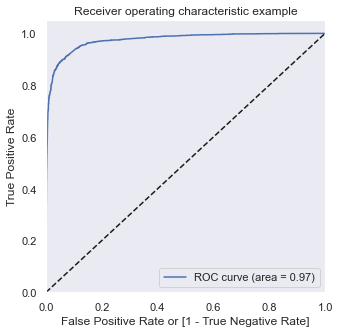

In [408]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


The MODEL has Area Under Curve (AUC) value of 0.97, which is a very good indicator

In [409]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.999189,4947,1,99.92,1,1,1,1,1,1,1,1,1,1
1,0,0.301146,1487,0,30.11,1,1,1,1,0,0,0,0,0,0
2,0,0.000291,6604,0,0.03,1,0,0,0,0,0,0,0,0,0
3,0,0.008327,9140,0,0.83,1,0,0,0,0,0,0,0,0,0
4,1,0.964864,8038,1,96.49,1,1,1,1,1,1,1,1,1,1


In [410]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.401450  1.000000  0.000000
0.1   0.1  0.852470  0.973121  0.771549
0.2   0.2  0.904569  0.954641  0.870986
0.3   0.3  0.917889  0.918102  0.917746
0.4   0.4  0.923116  0.899202  0.939155
0.5   0.5  0.925139  0.879042  0.956056
0.6   0.6  0.923959  0.857203  0.968732
0.7   0.7  0.918901  0.834103  0.975775
0.8   0.8  0.902209  0.781604  0.983099
0.9   0.9  0.888214  0.735825  0.990423


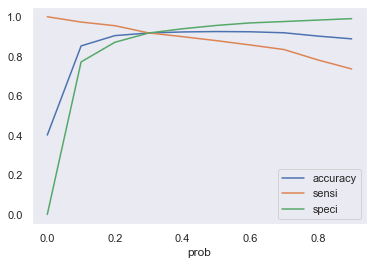

In [411]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

The various cutoff are plotted and 0.3 is where all values are converging. Let's re-calculate the final predicted values using 0.3 as threshold.

In [414]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Index,predicted,Conversion_Prob%,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.999189,4947,1,99.92,1,1,1,1,1,1,1,1,1,1,1
1,0,0.301146,1487,0,30.11,1,1,1,1,0,0,0,0,0,0,1
2,0,0.000291,6604,0,0.03,1,0,0,0,0,0,0,0,0,0,0
3,0,0.008327,9140,0,0.83,1,0,0,0,0,0,0,0,0,0,0
4,1,0.964864,8038,1,96.49,1,1,1,1,1,1,1,1,1,1,1


In [415]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9178890574945203

In [416]:
# Create Confusion Matrix again for new threshold
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3258,  292],
       [ 195, 2186]], dtype=int64)

In [417]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [418]:
# SENSITIVITY
print("Sensitivity:",round(100*(TP/float(FN+TP)),2),"%")

Sensitivity: 91.81 %


In [419]:
# SPECIFICITY
print("Specificity:",round(100*(TN/float(TN+FP)),2),"%")

Specificity: 91.77 %


In [420]:
# FALSE POSITIVE RATE
print("FPR:",round(100*(FP/float(FP+TN)),2),"%")

FPR: 8.23 %


In [421]:
# FALSE NEGATIVE RATE
print("FNR:",round(100*(FN/float(FN+TP)),2),"%")

FNR: 8.19 %


In [422]:
# positive predictive value
print("Positive Predictive Power:",round(100*(TP/float(TP+FP)),2),"%")

Positive Predictive Power: 88.22 %


In [423]:
# negative predictive value
print("Negative Predictive Power:",round(100*(TN/float(TN+FN)),2),"%")

Negative Predictive Power: 94.35 %


In [424]:
# ACCURACY SCORE
print("ACCURACY SCORE:",round(100*((TP+TN)/(TP+TN+FP+FN)),2),"%")

ACCURACY SCORE: 91.79 %


# Part 1.6. Precision and Recall

In [425]:
print("Precision Score of the Model:",round(100*(precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)),2),"%")


Precision Score of the Model: 88.22 %


In [426]:
print("Recall Score of the Model:",round(100*(recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)),2),"%")


Recall Score of the Model: 91.81 %


In [427]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


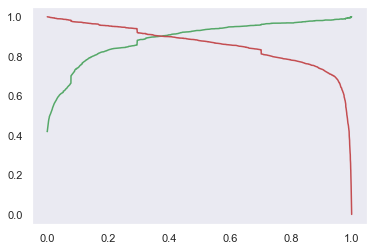

In [428]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Part 2: Test Data Predictions

Transform the test data

In [429]:
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [430]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead
4519,-0.913571,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1563,-0.913571,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
8538,1.417929,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7628,-0.913571,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3637,-0.256937,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


Add constant to test data befpre predictions

In [431]:
X_test_sm = sm.add_constant(X_test)

Create y_test predictions

In [433]:
y_test_pred = res.predict(X_test_sm)

In [434]:
y_test_pred[:10]

4519    0.295159
1563    0.982868
8538    0.975853
7628    0.295159
3637    0.007010
8261    0.995451
2497    0.999464
59      0.183760
1462    0.755969
5062    0.998593
dtype: float64

Converting y_pred to a dataframe from an array

In [435]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [436]:
# Let's see the head
y_pred_1.head()

,0
4519,0.295159
1563,0.982868
8538,0.975853
7628,0.295159
3637,0.007010


Converting y_test to dataframe

In [437]:
y_test_df = pd.DataFrame(y_test)

In [438]:
# Putting index as Lead Index
y_test_df['Lead Index'] = y_test_df.index

In [439]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [440]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [441]:
y_pred_final.head()

,Converted,Lead Index,0
0,0,4519,0.295159
1,1,1563,0.982868
2,1,8538,0.975853
3,0,7628,0.295159
4,0,3637,0.007010


In [442]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [443]:
# Let's see the head of y_pred_final
y_pred_final.head()



,Converted,Lead Index,Converted_Prob
0,0,4519,0.295159
1,1,1563,0.982868
2,1,8538,0.975853
3,0,7628,0.295159
4,0,3637,0.007010


In [444]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final['Conversion_Prob%'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100,2))

# Let's see the head
y_pred_final.head()

,Converted,Lead Index,Converted_Prob,final_predicted,Conversion_Prob%
0,0,4519,0.295159,0,29.52
1,1,1563,0.982868,1,98.29
2,1,8538,0.975853,1,97.59
3,0,7628,0.295159,0,29.52
4,0,3637,0.007010,0,0.70


In [445]:
# Let's check the overall accuracy of Test Predictions
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9303971686983877

## Create Test Data Confusion Matrix

In [446]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1416,   75],
       [ 102,  950]], dtype=int64)

In [447]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [448]:
# SENSITIVITY
print("Sensitivity of the Test Predictions:",round(100*(TP_test/float(FN_test+TP_test)),2),"%")

Sensitivity of the Test Predictions: 90.3 %


In [449]:
# SPECIFICITY
print("Specificity of the Test Predictions:",round(100*(TN_test/float(TN_test+FP_test)),2),"%")

Specificity of the Test Predictions: 94.97 %


In [450]:
# ACCURACY SCORE
print("ACCURACY SCORE of the Test Data Predictions:",round(100*((TP_test+TN_test)/(TP_test+TN_test+FP_test+FN_test)),2),"%")

ACCURACY SCORE of the Test Data Predictions: 93.04 %


## Precision and Recall

In [451]:
print("Precision Score of the Test Data Predictions:",round(100*(precision_score(y_pred_final.Converted, y_pred_final.final_predicted)),2),"%")

Precision Score of the Test Data Predictions: 92.68 %


In [452]:
print("Recall Score of the Test Data Predictions:",round(100*(recall_score(y_pred_final.Converted, y_pred_final.final_predicted)),2),"%")


Recall Score of the Test Data Predictions: 90.3 %


In [453]:
# Let's check the overall accuracy.
print("Accuracy of the Test Data Predictions:",round(100*(metrics.accuracy_score(y_pred_final.Converted,y_pred_final.final_predicted)),2),"%")


Accuracy of the Test Data Predictions: 93.04 %
